1. 난임 관련이기 때문에 임신 성공 여부와 관련성이 없어 보이는 컬럼은 제거

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

한글 폰트 설정

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

### EDA 시작

In [2]:
df = pd.read_csv('train.csv')
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

(None,
              ID 시술 시기 코드 시술 당시 나이  임신 시도 또는 마지막 임신 경과 연수 시술 유형 특정 시술 유형  \
 0  TRAIN_000000   TRZKPL  만18-34세                    NaN   IVF     ICSI   
 1  TRAIN_000001   TRYBLT  만45-50세                    NaN   IVF     ICSI   
 2  TRAIN_000002   TRVNRY  만18-34세                    NaN   IVF      IVF   
 3  TRAIN_000003   TRJXFG  만35-37세                    NaN   IVF     ICSI   
 4  TRAIN_000004   TRVNRY  만18-34세                    NaN   IVF     ICSI   
 
    배란 자극 여부    배란 유도 유형  단일 배아 이식 여부  착상 전 유전 검사 사용 여부  ...  기증 배아 사용 여부  \
 0         1  기록되지 않은 시행          0.0               NaN  ...          0.0   
 1         0      알 수 없음          0.0               NaN  ...          0.0   
 2         1  기록되지 않은 시행          0.0               NaN  ...          0.0   
 3         1  기록되지 않은 시행          0.0               NaN  ...          0.0   
 4         1  기록되지 않은 시행          0.0               NaN  ...          0.0   
 
    대리모 여부  PGD 시술 여부  PGS 시술 여부  난자 채취 경과일  난자 해동 경과일  난자 혼합 경과일  배아 이

In [10]:
df.shape

(256351, 69)

In [12]:
df.describe()

,임신 시도 또는 마지막 임신 경과 연수,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
count,9370.000000,256351.000000,250060.000000,2718.0,250060.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,...,250060.000000,250060.000000,2179.0,1929.0,198863.0,1436.000000,202616.000000,212785.000000,40369.000000,256351.000000
mean,9.270651,0.771286,0.233476,1.0,0.012781,0.028516,0.013115,0.030724,0.012432,0.033068,...,0.009830,0.004195,1.0,1.0,0.0,0.001393,0.005385,3.254741,0.045629,0.258349
std,3.550313,0.420005,0.423043,0.0,0.112328,0.166441,0.113767,0.172568,0.110805,0.178814,...,0.098656,0.064633,0.0,0.0,0.0,0.037307,0.111504,1.715697,0.418672,0.437728
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,3.000000,0.000000,0.000000
75%,11.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,5.000000,0.000000,1.000000
max,20.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,0.0,1.000000,7.000000,7.000000,7.000000,1.000000


# 결측치 파악

In [3]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("^~^결측치^~^")
print(missing_values)

^~^결측치^~^
난자 해동 경과일                254915
PGS 시술 여부                254422
PGD 시술 여부                254172
착상 전 유전 검사 사용 여부         253633
임신 시도 또는 마지막 임신 경과 연수    246981
배아 해동 경과일                215982
난자 채취 경과일                 57488
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
저장된 배아 수                   6291
단일 배아 이식 여부                6291
배아 생성 주요 이유                6291
착상 전 유전 진단 사용 여부           6291
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
기증 배아 사용 여부                6291
해동 난자 수                    6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
미세주입 배아 이식 수               6291
이식된 배아 수                   6291
미세주입에서 생성된 배아 수            6291
수집된 신선 난자 수                6291
파트너 정자와 혼합된 난자 수           6291
신선 배아 사용 여부                6291
동결 배아 사용 여부                6291
기증자 정자와 혼합된 난자 수           6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
대리모 여부                     6291
특정 시술 유형                      

In [5]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print("--- 결측치 비율 ---")
print(missing_percentage)

--- 결측치 비율 ---
난자 해동 경과일                99.439831
PGS 시술 여부                99.247516
PGD 시술 여부                99.149994
착상 전 유전 검사 사용 여부         98.939735
임신 시도 또는 마지막 임신 경과 연수    96.344855
배아 해동 경과일                84.252451
난자 채취 경과일                22.425503
난자 혼합 경과일                20.961494
배아 이식 경과일                16.994667
저장된 배아 수                  2.454057
단일 배아 이식 여부               2.454057
배아 생성 주요 이유               2.454057
착상 전 유전 진단 사용 여부          2.454057
총 생성 배아 수                 2.454057
미세주입된 난자 수                2.454057
기증 배아 사용 여부               2.454057
해동 난자 수                   2.454057
미세주입 후 저장된 배아 수           2.454057
해동된 배아 수                  2.454057
미세주입 배아 이식 수              2.454057
이식된 배아 수                  2.454057
미세주입에서 생성된 배아 수           2.454057
수집된 신선 난자 수               2.454057
파트너 정자와 혼합된 난자 수          2.454057
신선 배아 사용 여부               2.454057
동결 배아 사용 여부               2.454057
기증자 정자와 혼합된 난자 수          2.454057
저장된 신선 난자 수               2.454057
혼합된 난

### 10번째 컬럼부터는 컬럼에서 결측치 비율이 2.4%대로 급격히 줄어서 일단 위 9개 결측치를 어떻게 처리할지 판단할 필요가 있음

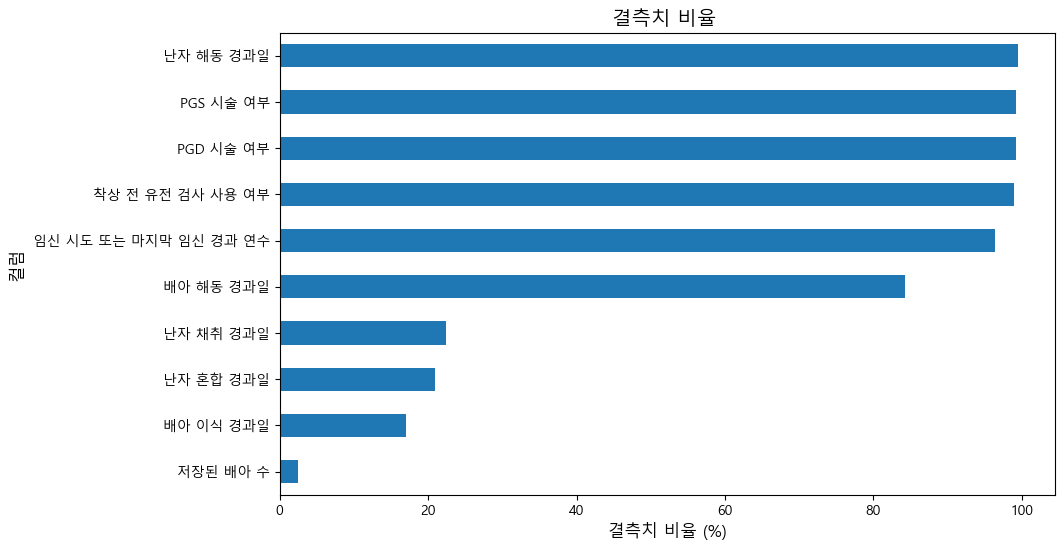

In [8]:
missing_percentage[:10].plot(kind="barh", figsize=(10, 6))

plt.title("결측치 비율 ", fontsize=14)
plt.xlabel("결측치 비율 (%)", fontsize=12)
plt.ylabel("컬럼", fontsize=12)
plt.gca().invert_yaxis() 

plt.show()

### 결측치 처리가 필요해 보이는 부분 
일단 96% 이상 데이터는 삭제해도 무방하다고 판단됨. 
- 난자 해동 경과일
- PGS 시술 여부
- PGD 시술 여부
- 착상 전 유전 검사 사용 여부
- 임신 시도 또는 마지막 임신 경과 연수

배아 해동경과일은 84%이므로 임신 성공여부 데이터와 상관성 파악 후 삭제 고려 할 예정

16~22% 결측치를 포함한 데이터
- 난자 채취 경과일
- 난자 혼합 경과일
- 배아 이식 경과일\
-> 데이터들은 난임과 관련성이 있다고 판단되면 결측치를 평균값으로 대체 할 예정

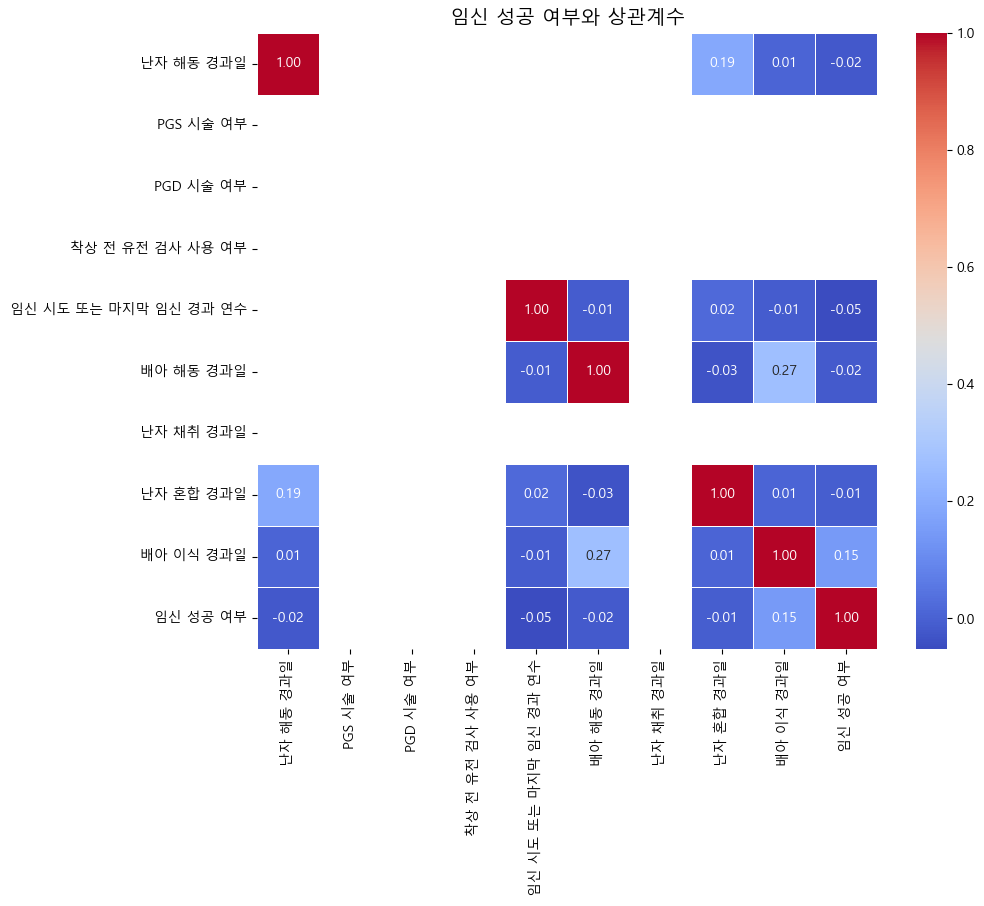

In [39]:
correlation_features_all = [
    "난자 해동 경과일", "PGS 시술 여부", "PGD 시술 여부", "착상 전 유전 검사 사용 여부", "임신 시도 또는 마지막 임신 경과 연수",
    "배아 해동 경과일", "난자 채취 경과일", "난자 혼합 경과일", "배아 이식 경과일", "임신 성공 여부"
]

correlation_matrix_all = df[correlation_features_all].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("임신 성공 여부와 상관계수", fontsize=14)
plt.show()

### -- 삭제할 변수 목록 ---

결측치 비율 96% 이상 (삭제)
- 난자 해동 경과일
- PGS 시술 여부
- PGD 시술 여부
- 착상 전 유전 검사 사용 여부
- 임신 시도 또는 마지막 임신 경과 연수

16~22% 결측치 포함된 변수 (삭제 고려)

- 배아 해동 경과일
- 난자 채취 경과일
- 난자 혼합 경과일
- 배아 이식 경과일


=> 컬럼 마구자비로 줄여보리기~

# 시술 당시 나이 분포 파악

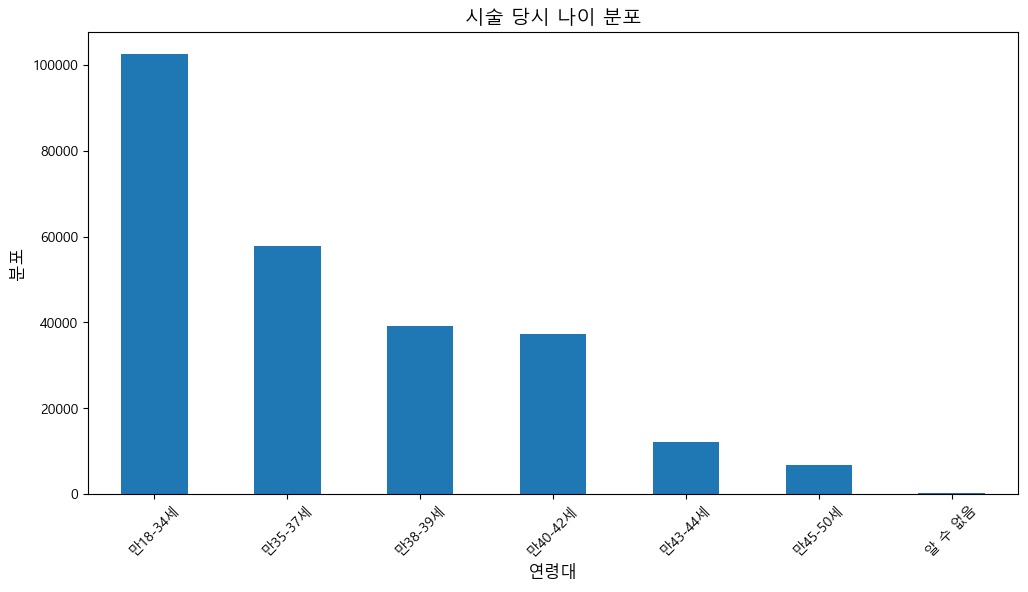

In [40]:
df["시술 당시 나이"].value_counts().sort_index().plot(kind="bar", figsize=(12, 6))

plt.title("시술 당시 나이 분포", fontsize=14)
plt.xlabel("연령대", fontsize=12)
plt.ylabel("분포", fontsize=12)
plt.xticks(rotation=45)
plt.show()

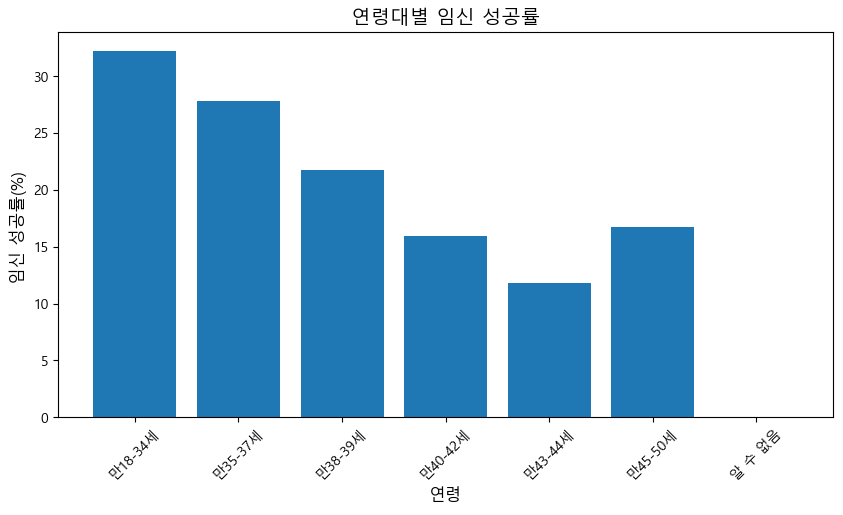

In [46]:
age_group_success_rate = df.groupby("시술 당시 나이")["임신 성공 여부"].mean() * 100

plt.figure(figsize=(10, 5))
plt.bar(age_group_success_rate.index, age_group_success_rate.values)
plt.xlabel("연령", fontsize=12)
plt.ylabel("임신 성공률(%) ", fontsize=12)
plt.title("연령대별 임신 성공률", fontsize=14)
plt.xticks(rotation=45)
plt.show()

연령대가 감소할수록 임신 성공률이 전체적으로 줄어듬

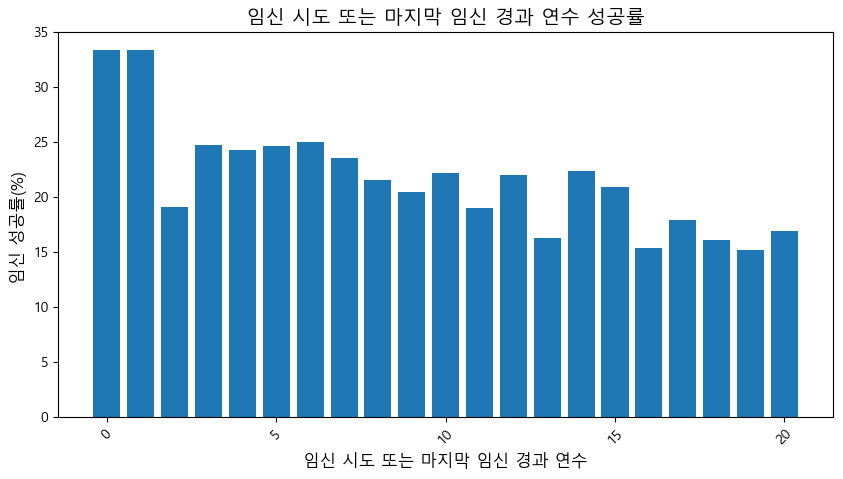

In [15]:
age_group_success_rate = df.groupby("임신 시도 또는 마지막 임신 경과 연수")["임신 성공 여부"].mean() * 100

plt.figure(figsize=(10, 5))
plt.bar(age_group_success_rate.index, age_group_success_rate.values)
plt.xlabel("임신 시도 또는 마지막 임신 경과 연수", fontsize=12)
plt.ylabel("임신 성공률(%) ", fontsize=12)
plt.title("임신 시도 또는 마지막 임신 경과 연수 성공률", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 시술별 성공률

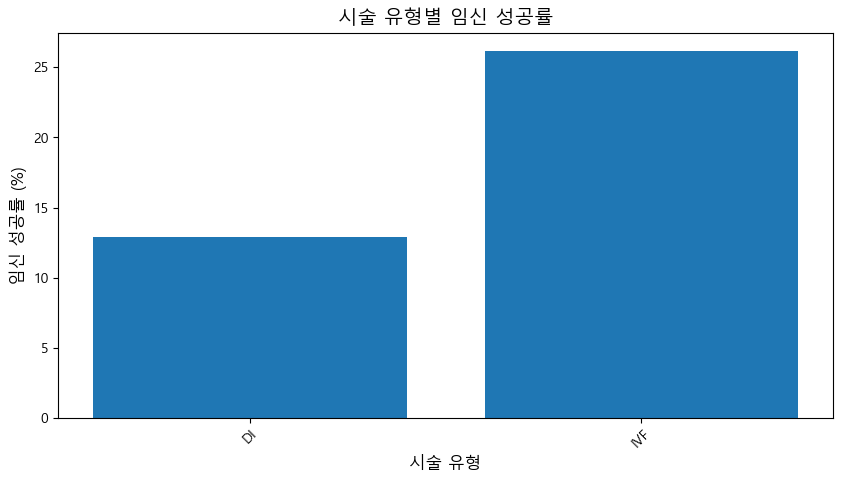

In [49]:
# 시술 유형별 임신 성공률 계산
treatment_success_rate = df.groupby("시술 유형")["임신 성공 여부"].mean() * 100

# 시각화
plt.figure(figsize=(10, 5))
plt.bar(treatment_success_rate.index, treatment_success_rate.values)
plt.xlabel("시술 유형", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("시술 유형별 임신 성공률", fontsize=14)
plt.xticks(rotation=45)
plt.show()

IVF가 성공률이 25% DI가 성공률이 약 15%로 나타남.

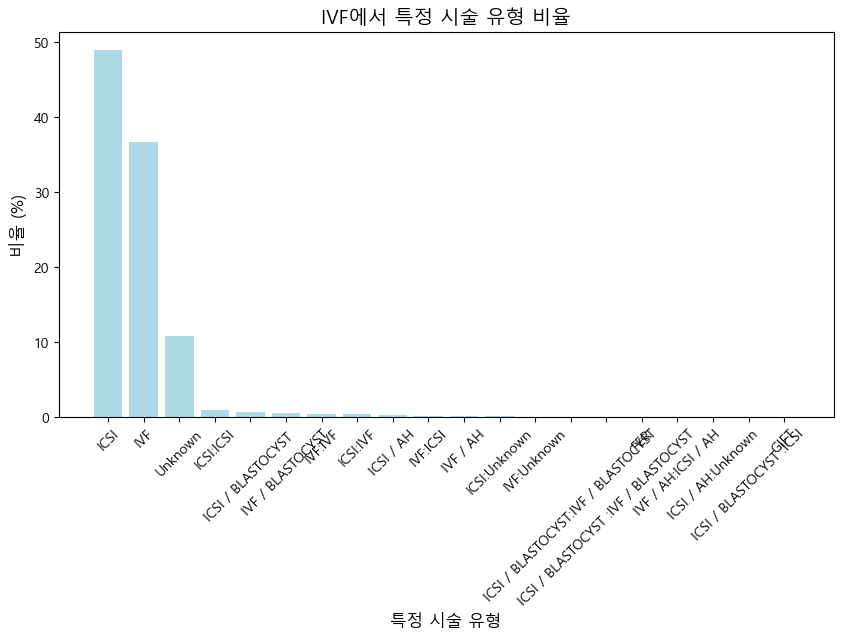

In [62]:
ivf_treatment_ratio = df[df["시술 유형"] == "IVF"]["특정 시술 유형"].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))
plt.bar(ivf_treatment_ratio.index, ivf_treatment_ratio.values, color="lightblue")
plt.xlabel("특정 시술 유형", fontsize=12)
plt.ylabel("비율 (%)", fontsize=12)
plt.title("IVF에서 특정 시술 유형 비율", fontsize=14)
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

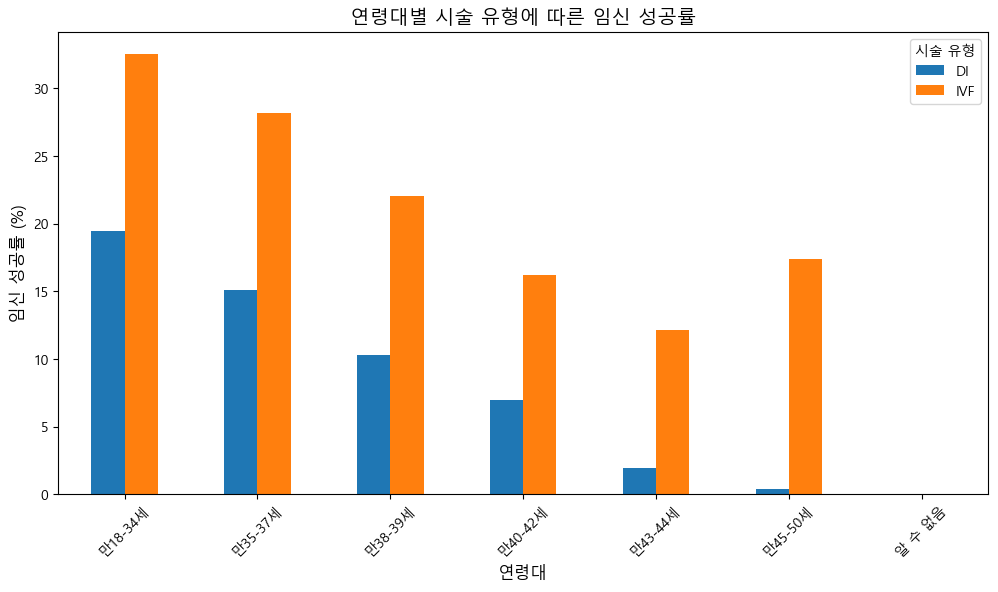

In [ ]:
age_treatment_success = df.groupby(["시술 당시 나이", "시술 유형"])["임신 성공 여부"].mean().unstack() * 100

plt.figure(figsize=(12, 6))
age_treatment_success.plot(kind="bar", figsize=(12, 6))
plt.xlabel("연령대", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("연령대별 시술 유형에 따른 임신 성공률", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="시술 유형")
plt.show()

전체적으로 연령대별로도 IVF의 성공률이 DI보다 높으며 연령대가 증가할수록 감소폭도 DI가 훨씬 크다.

### IVF에서 ICSI와 IVF 두 시술의 성공률이 약 26퍼로 거의 비슷하여 추가적으로 분석할 필요 없어보임

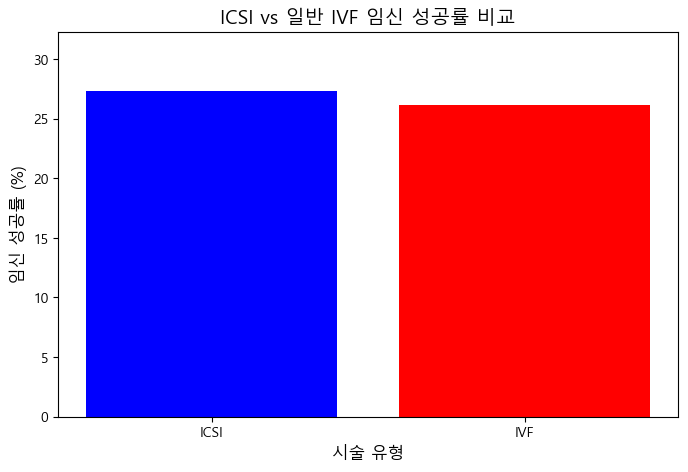

In [58]:
ivf_success_rate = df[df["시술 유형"] == "IVF"].groupby("특정 시술 유형")["임신 성공 여부"].mean() * 100

ivf_success_rate_filtered = ivf_success_rate[ivf_success_rate.index.isin(["ICSI", "IVF"])]

plt.figure(figsize=(8, 5))
plt.bar(ivf_success_rate_filtered.index, ivf_success_rate_filtered.values, color=["blue","red"])
plt.xlabel("시술 유형", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("ICSI vs 일반 IVF 임신 성공률 비교", fontsize=14)
plt.ylim(0, max(ivf_success_rate_filtered.values) + 5)
plt.show()

### DI에서 IUI 시술 유형이 거의 대부분을 차지하고 있음

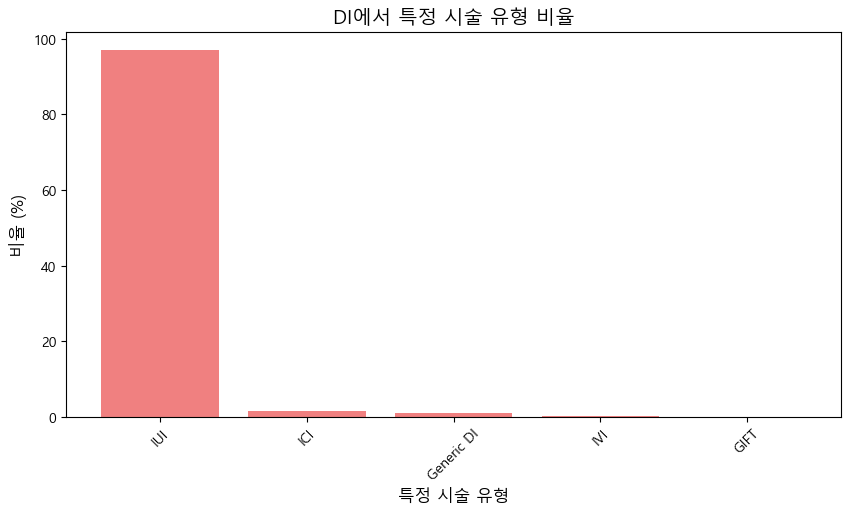

In [63]:
di_treatment_ratio = df[df["시술 유형"] == "DI"]["특정 시술 유형"].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))
plt.bar(di_treatment_ratio.index, di_treatment_ratio.values, color="lightcoral")
plt.xlabel("특정 시술 유형", fontsize=12)
plt.ylabel("비율 (%)", fontsize=12)
plt.title("DI에서 특정 시술 유형 비율", fontsize=14)
plt.xticks(rotation=45)
plt.show()

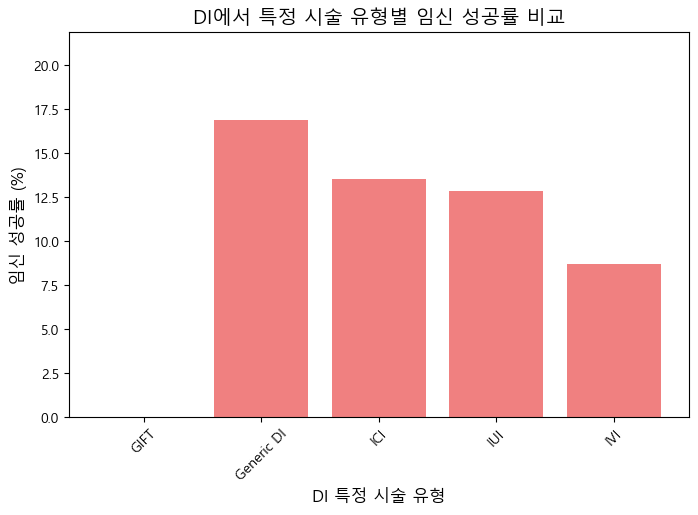

In [59]:
di_success_rate = df[df["시술 유형"] == "DI"].groupby("특정 시술 유형")["임신 성공 여부"].mean() * 100

plt.figure(figsize=(8, 5))
plt.bar(di_success_rate.index, di_success_rate.values, color="lightcoral")
plt.xlabel("DI 특정 시술 유형", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("DI에서 특정 시술 유형별 임신 성공률 비교", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, max(di_success_rate.values) + 5)
plt.show()

## 두 시술 유형 IVF와 DI 비율 분석

- 전체적으로 IVF 방식이 압도적인 비율을 차지하고 DI는 매우 적음.
\
=> 데이터 분석은 IVF 중심으로 할 필요가 있음

IVF 분석
- ICSI 시술이 약 50%로 가장 높은 비율을 차지함
- IVF가 두 번째로 높은 비율을 차지
- 나머지 시술은 상대적으로 비중이 매우 낮음
- IVF와 ICSI가 성공률이 약 25%로 둘이 비슷해서 굳이 성공률 차이 분석 필요없음.

DI 분석
- IUI 시술이 90%이상으로 거의 대부분임
- ICI 외에 나머지는 거의 매우 낮음
- DI는 데이터 자체가 IVF보다 작아서 굳이 또 특정유형시술별로 나눌 필요 없어보임.

# 피쳐 6~7 배란 관련 분석

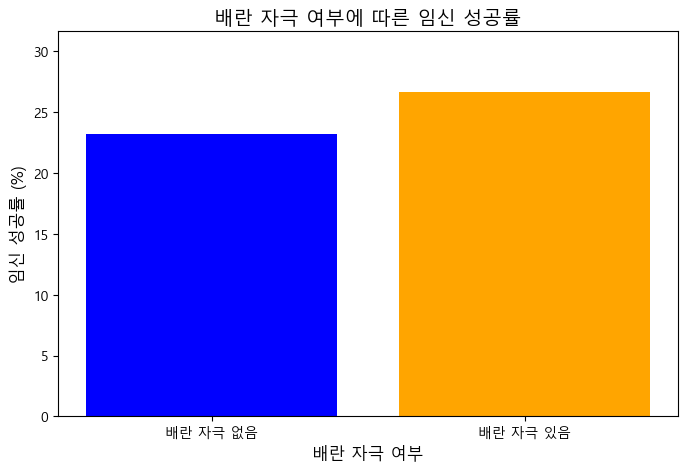

In [67]:
ovulation_success_rate = df.groupby("배란 자극 여부")["임신 성공 여부"].mean() * 100

plt.figure(figsize=(8, 5))
plt.bar(ovulation_success_rate.index.astype(str), ovulation_success_rate.values, color=["blue", "orange"])
plt.xlabel("배란 자극 여부", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("배란 자극 여부에 따른 임신 성공률", fontsize=14)
plt.xticks([0, 1], ["배란 자극 없음", "배란 자극 있음"])
plt.ylim(0, max(ovulation_success_rate.values) + 5)
plt.show()

### 배란을 자극한 경우 약 5% 정도 더 높은 임신 성공률이 보임. 배란 자극은 임신 가능성을 높이는데 도움이 된다 판단.

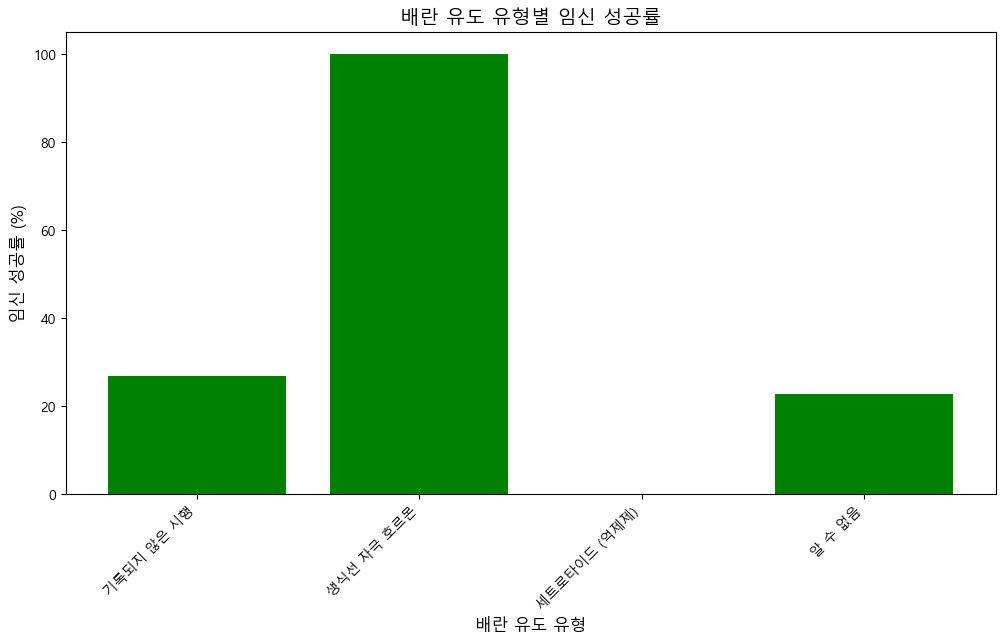

=== 배란 유도 유형별 임신 성공률 비교 ===
배란 유도 유형
기록되지 않은 시행       26.840746
생식선 자극 호르몬      100.000000
세트로타이드 (억제제)      0.000000
알 수 없음           22.675517
Name: 임신 성공 여부, dtype: float64


In [77]:
ovulation_type_success_rate = df.groupby("배란 유도 유형")["임신 성공 여부"].mean() * 100

plt.figure(figsize=(12, 6))
plt.bar(ovulation_type_success_rate.index, ovulation_type_success_rate.values, color="green")
plt.xlabel("배란 유도 유형", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("배란 유도 유형별 임신 성공률", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, max(ovulation_type_success_rate.values) + 5)
plt.show()

print("=== 배란 유도 유형별 임신 성공률 비교 ===")
print(ovulation_type_success_rate)

### 4개의 배란 유도 유형 중 생식선 자극 호르몬이 압도적으로 높은 성공률을 보임. 데이터 수에 따라 신뢰도 판단을 위해 데이터수를 보겠슴다~

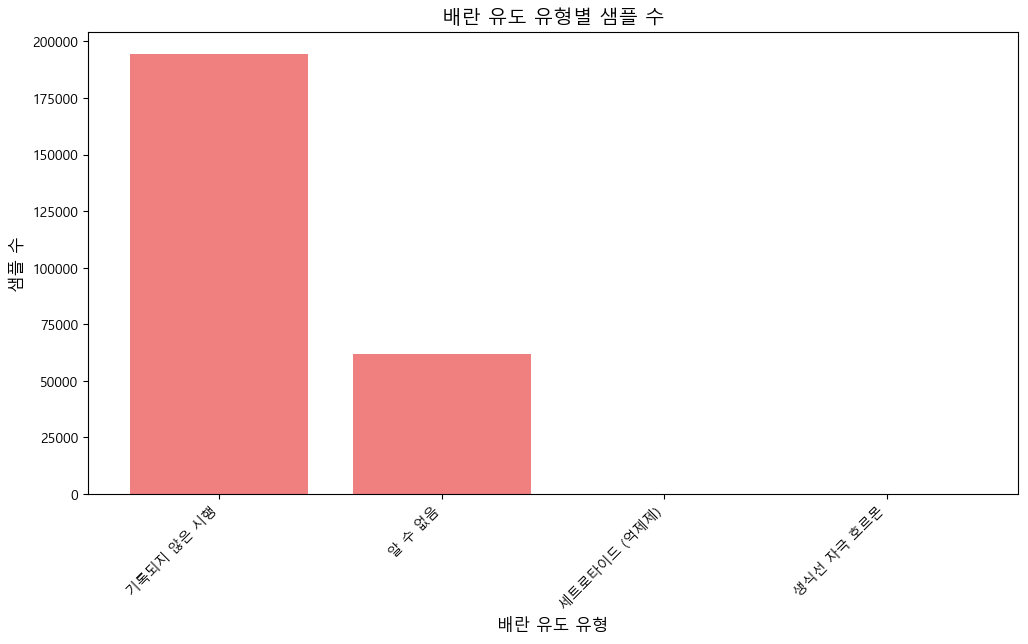

=== 배란 유도 유형별 샘플 수 ===
배란 유도 유형
기록되지 않은 시행      194432
알 수 없음           61917
세트로타이드 (억제제)         1
생식선 자극 호르몬           1
Name: count, dtype: int64


In [76]:
ovulation_type_counts = df["배란 유도 유형"].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(ovulation_type_counts.index, ovulation_type_counts.values, color="lightcoral")
plt.xlabel("배란 유도 유형", fontsize=12)
plt.ylabel("샘플 수", fontsize=12)
plt.title("배란 유도 유형별 샘플 수", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

print("=== 배란 유도 유형별 샘플 수 ===")
print(ovulation_type_counts)

생식선 자극 호르몬 데이터는 거의 없어서 분석할 가치가 없다 판단

- 기록되지 않은 시행이 무슨 시행인지는 모르겠지만 배란 자극을 안한 그룹에 비해 임신 성공률이 더 높음. 필요할 때 추가 분석하고 일단 유지. 
- 추가적으로 세트로타이드와 생식선 자극 호르몬의 경우 데이터가 1개라 크게 필요 없어보임.

<Figure size 1200x600 with 0 Axes>

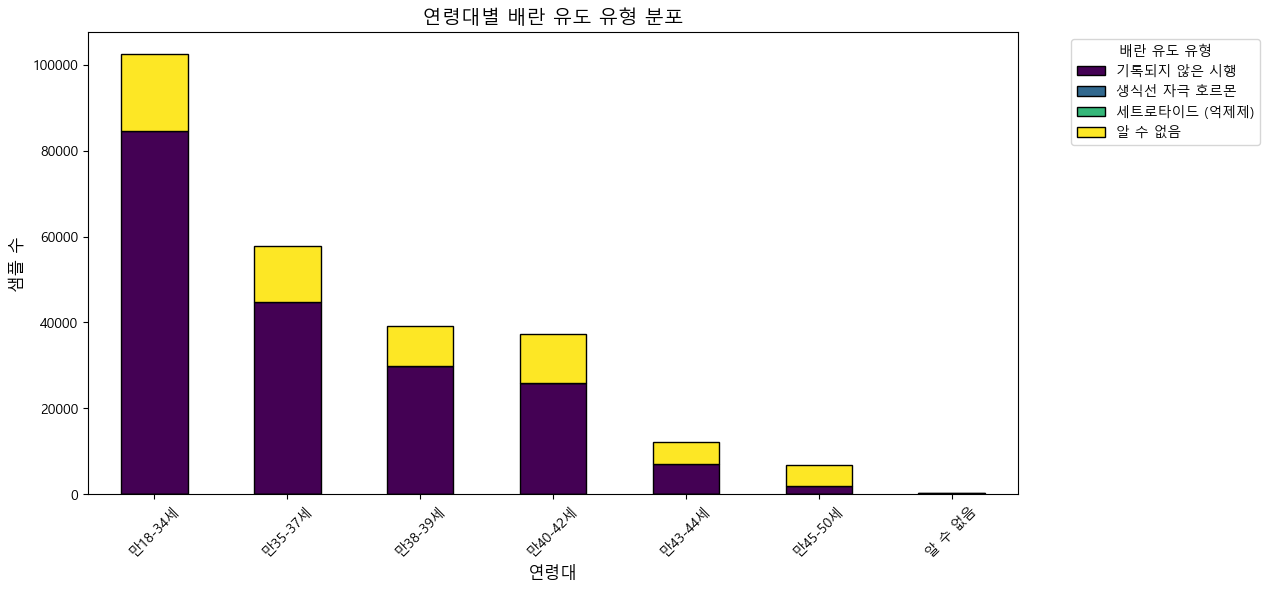

In [78]:
age_ovulation_type = df.groupby(["시술 당시 나이", "배란 유도 유형"]).size().unstack()

plt.figure(figsize=(12, 6))
age_ovulation_type.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.xlabel("연령대", fontsize=12)
plt.ylabel("샘플 수", fontsize=12)
plt.title("연령대별 배란 유도 유형 분포", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="배란 유도 유형", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

연령이 증가할 수록 기록되지 않은 시행(자극o)이 감소하며 알 수 없음(자극x)이 증가하는 것으로 보아 고령층은 배란 유도 자극이 의미가 없는 것으로 파악

#### 유전 검사

착상 전 유전 검사 사용 여부    2718.0
착상 전 유전 진단 사용 여부    3196.0
dtype: float64


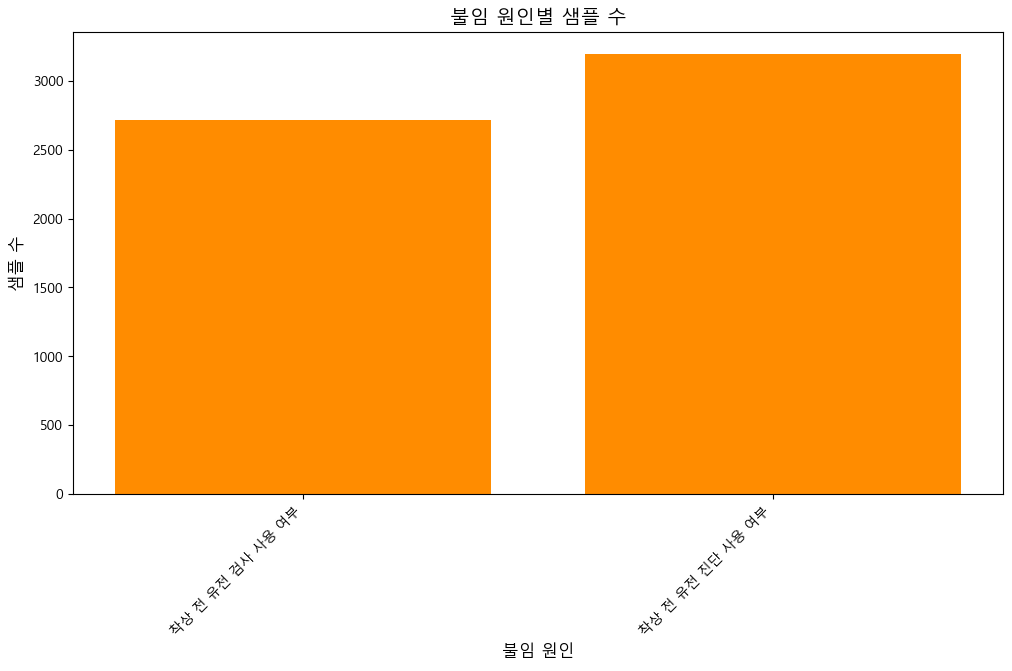

In [19]:
gene = ['착상 전 유전 검사 사용 여부','착상 전 유전 진단 사용 여부']

gene_counts = df[gene].sum()

print(gene_counts)

plt.figure(figsize=(12, 6))
plt.bar(gene_counts.index, gene_counts.values, color="darkorange")
plt.xlabel("불임 원인", fontsize=12)
plt.ylabel("샘플 수", fontsize=12)
plt.title("불임 원인별 샘플 수", fontsize=14)
plt.xticks(rotation=45, ha="right") 
plt.show()

### 불임원인 별로 분석 시작
9~10(유전 검사) 맨 위에서 말한 것처럼 데이터가 별로 의미 없어서 pass함.

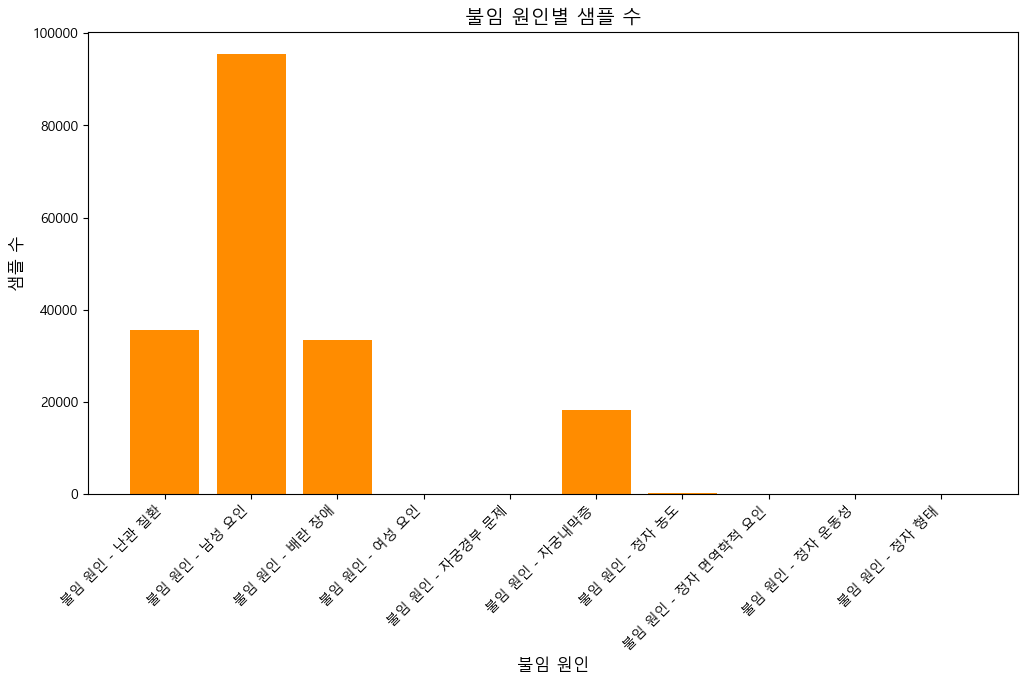

=== 불임 원인별 샘플 수 ===
불임 원인 - 난관 질환         35557
불임 원인 - 남성 요인         95466
불임 원인 - 배란 장애         33426
불임 원인 - 여성 요인             0
불임 원인 - 자궁경부 문제          10
불임 원인 - 자궁내막증         18302
불임 원인 - 정자 농도           276
불임 원인 - 정자 면역학적 요인        1
불임 원인 - 정자 운동성           97
불임 원인 - 정자 형태           143
dtype: int64


In [16]:
infertility_columns = ["불임 원인 - 난관 질환", "불임 원인 - 남성 요인", "불임 원인 - 배란 장애", "불임 원인 - 여성 요인", "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증", "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태"]

infertility_sample_counts = df[infertility_columns].sum()

plt.figure(figsize=(12, 6))
plt.bar(infertility_sample_counts.index, infertility_sample_counts.values, color="darkorange")
plt.xlabel("불임 원인", fontsize=12)
plt.ylabel("샘플 수", fontsize=12)
plt.title("불임 원인별 샘플 수", fontsize=14)
plt.xticks(rotation=45, ha="right") 
plt.show()

print("=== 불임 원인별 샘플 수 ===")
print(infertility_sample_counts)

샘플 수가 많은 데이터 위주록 일단 분석한다.
샘플 수가 많은 데이터 : 난관 질환, 남성 요인, 배란 장애, 자궁 내막증

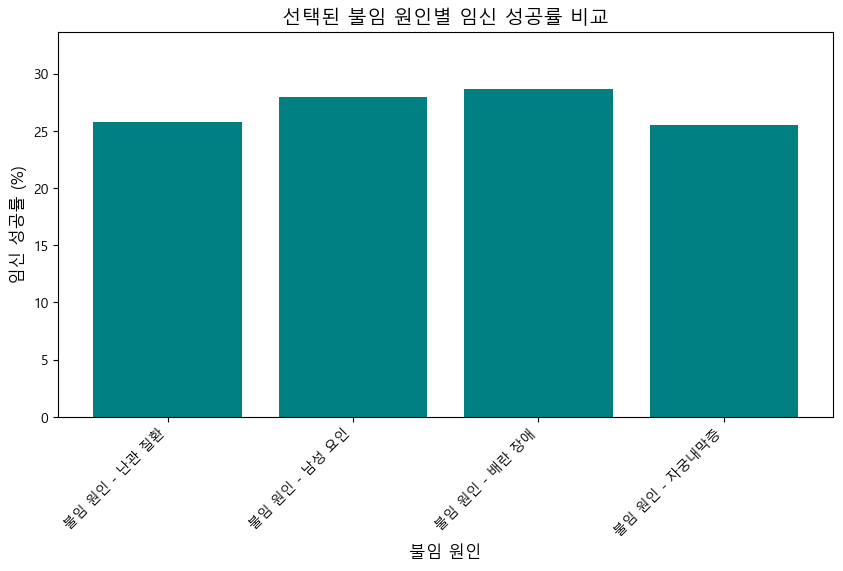

=== 선택된 불임 원인별 임신 성공률 ===
               임신 성공률 (%)
불임 원인 - 난관 질환   25.775515
불임 원인 - 남성 요인   27.989022
불임 원인 - 배란 장애   28.663316
불임 원인 - 자궁내막증   25.483554


In [85]:
selected_infertility_columns = ["불임 원인 - 난관 질환", "불임 원인 - 남성 요인", "불임 원인 - 배란 장애", "불임 원인 - 자궁내막증"]

selected_infertility_success_rates = {}
for col in selected_infertility_columns:
    success_rate = df[df[col] == 1]["임신 성공 여부"].mean() * 100
    selected_infertility_success_rates[col] = success_rate

selected_infertility_success_df = pd.DataFrame.from_dict(selected_infertility_success_rates, orient="index", columns=["임신 성공률 (%)"])

plt.figure(figsize=(10, 5))
plt.bar(selected_infertility_success_df.index, selected_infertility_success_df["임신 성공률 (%)"], color="teal")
plt.xlabel("불임 원인", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("선택된 불임 원인별 임신 성공률 비교", fontsize=14)
plt.xticks(rotation=45, ha="right")  # x축 레이블 회전
plt.ylim(0, max(selected_infertility_success_df["임신 성공률 (%)"]) + 5)
plt.show()

print("=== 선택된 불임 원인별 임신 성공률 ===")
print(selected_infertility_success_df)

전체적으로 성공률은 25~28%로 크게 차이가 없음.
배란 장애 환자들이 배란 자극 유도를 통해 높은 성공률을 보인다고 생각할 수 있음.

<Figure size 1000x600 with 0 Axes>

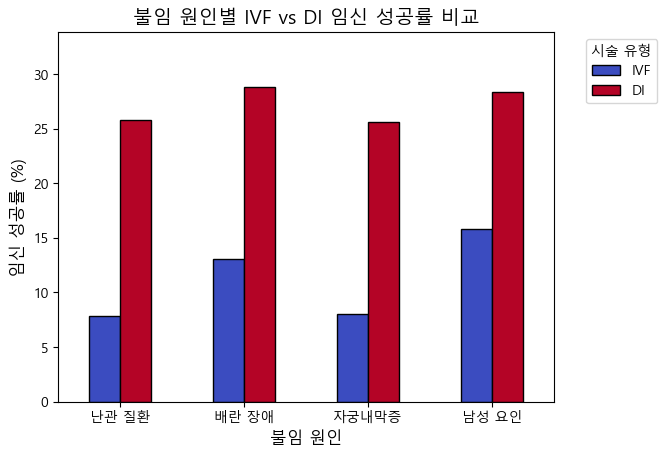

In [112]:
selected_conditions = ["불임 원인 - 난관 질환", "불임 원인 - 배란 장애", "불임 원인 - 자궁내막증", "불임 원인 - 남성 요인"]
condition_success_rates = {}

for condition in selected_conditions:
    condition_filtered = df[(df[condition] == 1) & (df["시술 유형"].isin(["IVF", "DI"]))]
    success_rates = condition_filtered.groupby("시술 유형")["임신 성공 여부"].mean() * 100
    condition_success_rates[condition] = success_rates

condition_success_df = pd.DataFrame(condition_success_rates).T

condition_labels = {
    "불임 원인 - 난관 질환": "난관 질환",
    "불임 원인 - 배란 장애": "배란 장애",
    "불임 원인 - 자궁내막증": "자궁내막증",
    "불임 원인 - 남성 요인": "남성 요인"
}

# 그래프 시각화 (X축 라벨 정리 적용)
plt.figure(figsize=(10, 6))
ax = condition_success_df.plot(kind="bar", colormap="coolwarm", edgecolor="black")
plt.xlabel("불임 원인", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("불임 원인별 IVF vs DI 임신 성공률 비교", fontsize=14)
plt.xticks(ticks=range(len(condition_labels)), labels=condition_labels.values(), rotation=0)
plt.legend(["IVF", "DI"], title="시술 유형", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0, max(condition_success_df.max()) + 5)
plt.show()


전체적으로 IVF 시술을 할 때가 성공률이 더 높음 25~28% 성공률이 평균에 비해 크게 증가한 컬럼이 없으므로 추가 분석 pass.

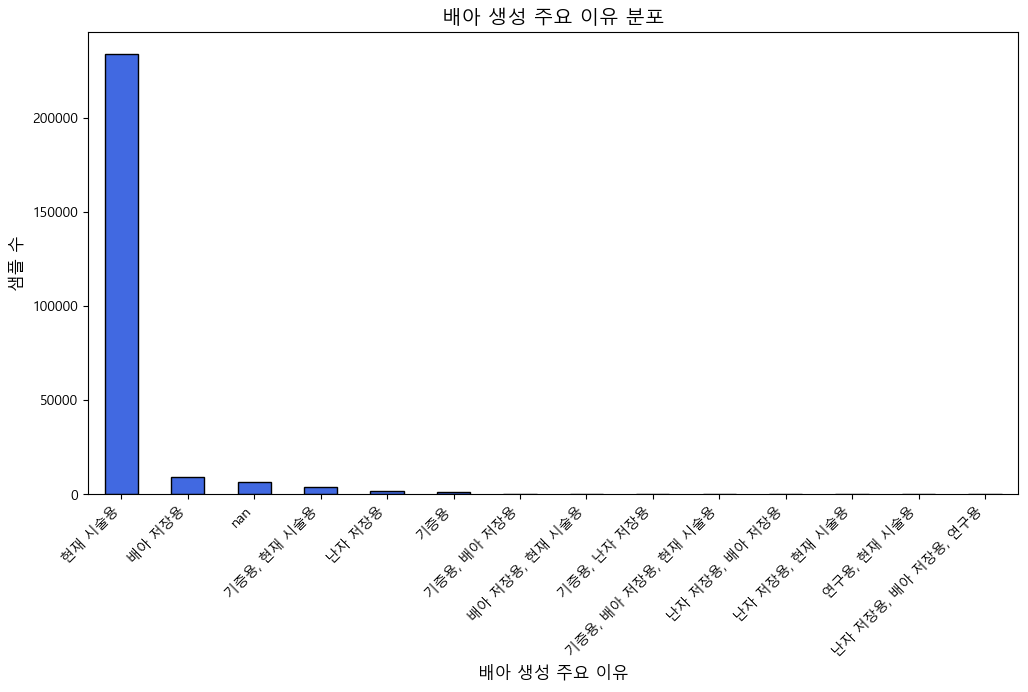

배아 생성 주요 이유
현재 시술용                 233732
배아 저장용                   9192
NaN                      6291
기증용, 현재 시술용              3784
난자 저장용                   1959
기증용                      1108
기증용, 배아 저장용               125
배아 저장용, 현재 시술용             83
기증용, 난자 저장용                44
기증용, 배아 저장용, 현재 시술용        20
난자 저장용, 배아 저장용              6
난자 저장용, 현재 시술용              5
연구용, 현재 시술용                 1
난자 저장용, 배아 저장용, 연구용         1
Name: count, dtype: int64

In [113]:
embryo_creation_reasons = df["배아 생성 주요 이유"].value_counts(dropna=False)

plt.figure(figsize=(12, 6))
embryo_creation_reasons.plot(kind="bar", color="royalblue", edgecolor="black")
plt.xlabel("배아 생성 주요 이유", fontsize=12)
plt.ylabel("샘플 수", fontsize=12)
plt.title("배아 생성 주요 이유 분포", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

embryo_creation_reasons

배아 생성 주요 이유 컬럼
- 데이터 불균형이 너무 심함.
- 현재 시술용, 배아 저장용 말고는 굳이 필요 없어보임

근데 사실 여기서 굳이 머 할게 있나?

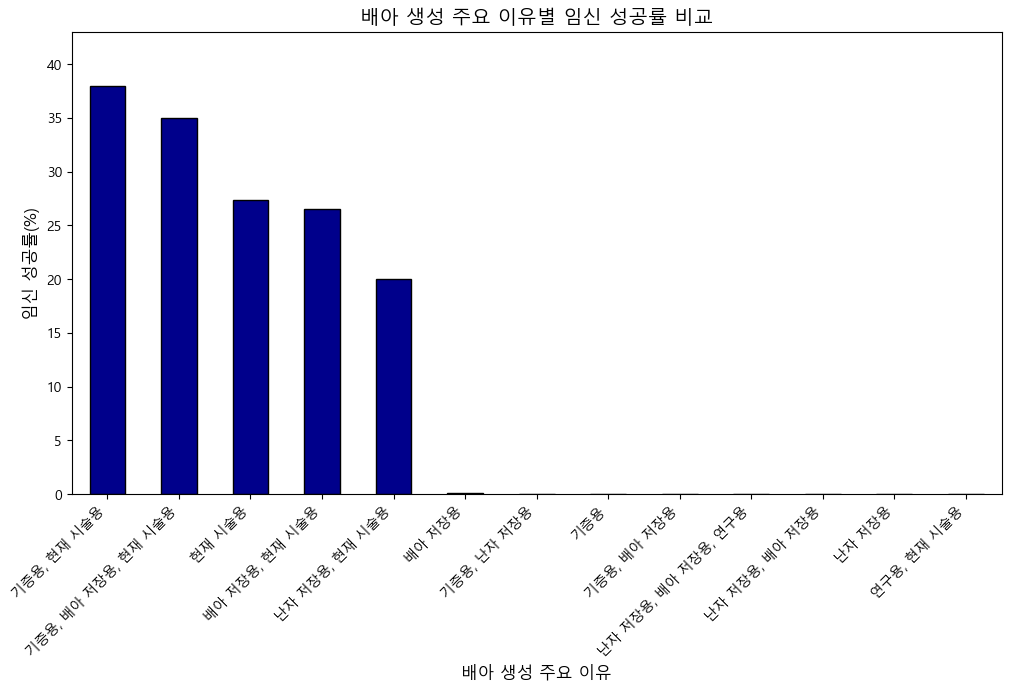

배아 생성 주요 이유
기증용                     0.000000
기증용, 난자 저장용             0.000000
기증용, 배아 저장용             0.000000
기증용, 배아 저장용, 현재 시술용    35.000000
기증용, 현재 시술용            37.975687
난자 저장용                  0.000000
난자 저장용, 배아 저장용          0.000000
난자 저장용, 배아 저장용, 연구용     0.000000
난자 저장용, 현재 시술용         20.000000
배아 저장용                  0.087032
배아 저장용, 현재 시술용         26.506024
연구용, 현재 시술용             0.000000
현재 시술용                 27.356973
Name: 임신 성공 여부, dtype: float64

In [122]:
embryo_reason_success = df.groupby("배아 생성 주요 이유")["임신 성공 여부"].mean() * 100

plt.figure(figsize=(12, 6))
embryo_reason_success.sort_values(ascending=False).plot(kind="bar", color="darkblue", edgecolor="black")
plt.xlabel("배아 생성 주요 이유", fontsize=12)
plt.ylabel("임신 성공률(%)", fontsize=12)
plt.title("배아 생성 주요 이유별 임신 성공률 비교", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, max(embryo_reason_success) + 5)
plt.show()

embryo_reason_success

현재 시술용이 대부분의 분포를 차지하는데 성공률이 대부분의 평균이랑 유사 크게 뭐 할 거 없음\
심지어 배아 저장용은 실제 시술이 이러나지 않은 거라 데이터가 쓸모없어보임, 노이즈로 판단됨\
오히려 컬럼을 제거해도 괜찮다고 판단함.

### 다음으로 29번 컬럼 총 시술 횟수와 임신 성공률 관계

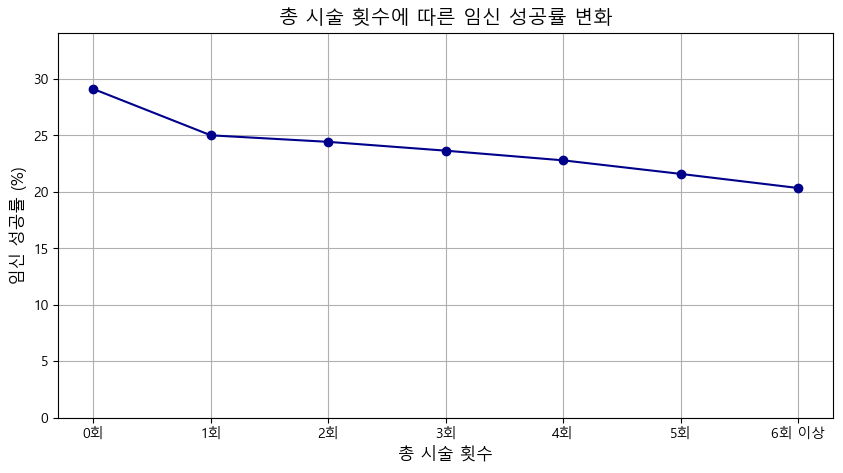

총 시술 횟수
0회       29.098659
1회       24.995160
2회       24.416595
3회       23.635400
4회       22.779209
5회       21.579179
6회 이상    20.330028
Name: 임신 성공 여부, dtype: float64

In [123]:
df["총 시술 횟수"] = df["총 시술 횟수"].astype(str)
treatment_success_rate = df.groupby("총 시술 횟수")["임신 성공 여부"].mean() * 100

order = ["0회", "1회", "2회", "3회", "4회", "5회", "6회 이상"]
treatment_success_rate = treatment_success_rate.reindex(order)

plt.figure(figsize=(10, 5))
plt.plot(treatment_success_rate.index, treatment_success_rate.values, marker="o", linestyle="-", color="darkblue")
plt.xlabel("총 시술 횟수", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("총 시술 횟수에 따른 임신 성공률 변화", fontsize=14)
plt.grid(True)
plt.xticks(rotation=0)
plt.ylim(0, max(treatment_success_rate.values) + 5)
plt.show()

treatment_success_rate

1. 총 시술 횟수가 증가할수록 임신 성공률이 점점 감소한다.
- 0회차에 29퍼에서 1회 24퍼로 급격히 감소 후 시술 횟수가 늘어날 때마다 점점 감소한다.

이건 딱 봐도 중요한 피처임

다음으로 클리닉 내 시술 횟수 증가에 따른 임신 성공률 관계
=> 한 병원에서 시술을 꾸준히 받은 것을 뜻함

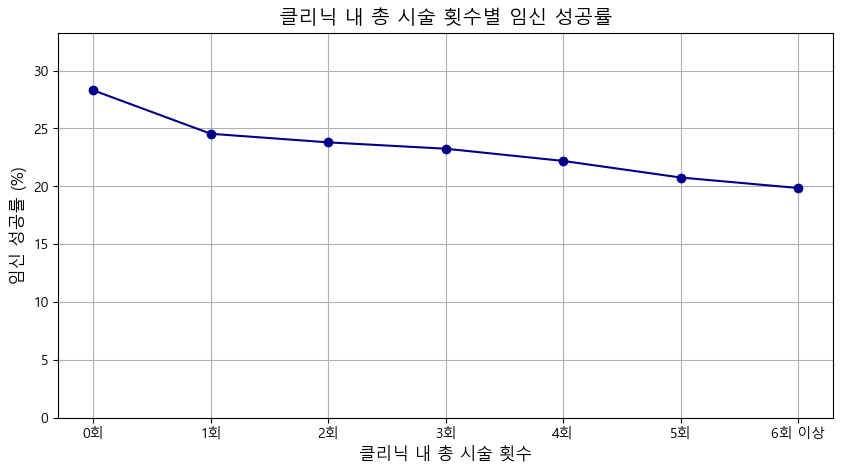

클리닉 내 총 시술 횟수
0회       28.291761
1회       24.537680
2회       23.794919
3회       23.244539
4회       22.190058
5회       20.756116
6회 이상    19.848255
Name: 임신 성공 여부, dtype: float64

In [130]:
df["클리닉 내 총 시술 횟수"] = df["클리닉 내 총 시술 횟수"].astype(str)

clinic_treatment_success = df.groupby("클리닉 내 총 시술 횟수")["임신 성공 여부"].mean() * 100

plt.figure(figsize=(10, 5))
plt.plot(clinic_treatment_success.index, clinic_treatment_success.values, marker="o", linestyle="-", color="darkblue")
plt.xlabel("클리닉 내 총 시술 횟수", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("클리닉 내 총 시술 횟수별 임신 성공률", fontsize=14)
plt.grid(True)
plt.xticks(rotation=0)
plt.ylim(0, max(clinic_treatment_success.values) + 5)
plt.show()

clinic_treatment_success

총 시술 횟수 때보다 성공률이 더 감소함.
- 이는 특정 한 병원에서 계속 시술을 받을 경우 평균보다 성공률이 더 낮아진다는 것을 뜻함.

IVF, DI 시술 횟수 피처에 따른 임신 성공률 관계

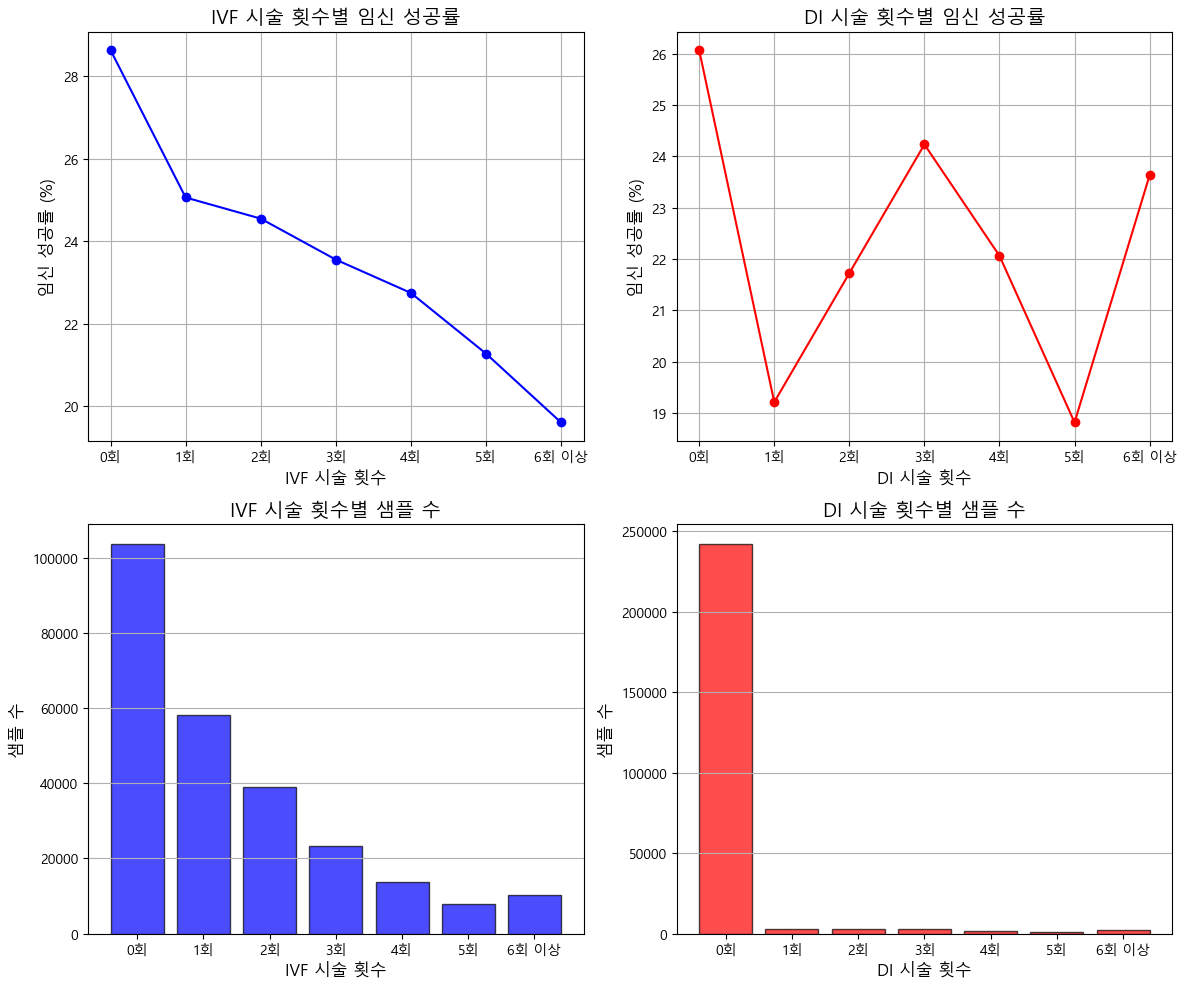

(IVF 시술 횟수
 0회       28.625859
 1회       25.056994
 2회       24.545014
 3회       23.552405
 4회       22.745242
 5회       21.276596
 6회 이상    19.608229
 Name: 임신 성공 여부, dtype: float64,
 DI 시술 횟수
 0회       26.065313
 1회       19.212329
 2회       21.723220
 3회       24.229782
 4회       22.061378
 5회       18.817652
 6회 이상    23.630673
 Name: 임신 성공 여부, dtype: float64,
 IVF 시술 횟수
 0회       103934
 1회        58339
 2회        39177
 3회        23280
 4회        13660
 5회         7802
 6회 이상     10159
 Name: count, dtype: int64,
 DI 시술 횟수
 0회       242464
 1회         2920
 2회         3006
 3회         3116
 4회         1727
 5회         1201
 6회 이상      1917
 Name: count, dtype: int64)

In [27]:
ivf_success_rate = df.groupby("IVF 시술 횟수")["임신 성공 여부"].mean() * 100

di_success_rate = df.groupby("DI 시술 횟수")["임신 성공 여부"].mean() * 100

ivf_sample_count = df["IVF 시술 횟수"].value_counts().sort_index()
di_sample_count = df["DI 시술 횟수"].value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(ivf_success_rate.index, ivf_success_rate.values, marker="o", linestyle="-", color="blue")
axes[0, 0].set_xlabel("IVF 시술 횟수", fontsize=12)
axes[0, 0].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[0, 0].set_title("IVF 시술 횟수별 임신 성공률", fontsize=14)
axes[0, 0].grid(True)

axes[0, 1].plot(di_success_rate.index, di_success_rate.values, marker="o", linestyle="-", color="red")
axes[0, 1].set_xlabel("DI 시술 횟수", fontsize=12)
axes[0, 1].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[0, 1].set_title("DI 시술 횟수별 임신 성공률", fontsize=14)
axes[0, 1].grid(True)

axes[1, 0].bar(ivf_sample_count.index, ivf_sample_count.values, color="blue", alpha=0.7, edgecolor="black")
axes[1, 0].set_xlabel("IVF 시술 횟수", fontsize=12)
axes[1, 0].set_ylabel("샘플 수", fontsize=12)
axes[1, 0].set_title("IVF 시술 횟수별 샘플 수", fontsize=14)
axes[1, 0].grid(axis="y")

axes[1, 1].bar(di_sample_count.index, di_sample_count.values, color="red", alpha=0.7, edgecolor="black")
axes[1, 1].set_xlabel("DI 시술 횟수", fontsize=12)
axes[1, 1].set_ylabel("샘플 수", fontsize=12)
axes[1, 1].set_title("DI 시술 횟수별 샘플 수", fontsize=14)
axes[1, 1].grid(axis="y")

plt.tight_layout()
plt.show()

ivf_success_rate, di_success_rate, ivf_sample_count, di_sample_count

이제 총 임신 횟수, IVF 임신 횟수, DI 임신 횟수, 총 출산 횟수, IVF 출산 횟수, DI 출산 횟수 분석 슈웃~

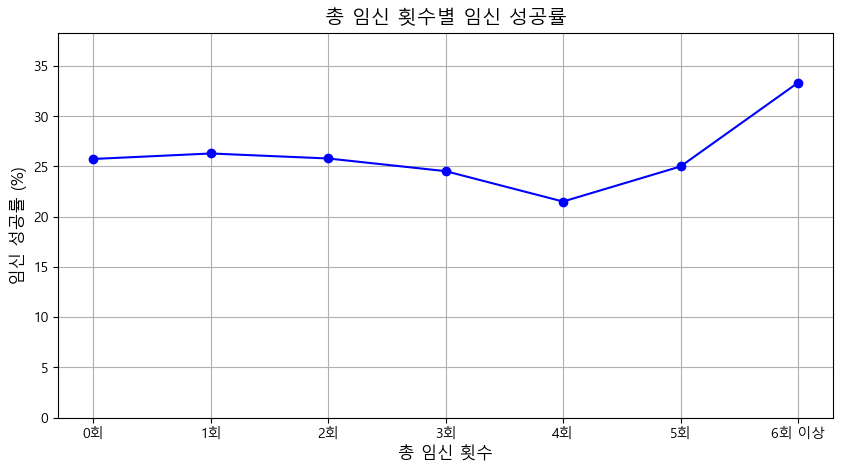

총 임신 횟수
0회       25.745524
1회       26.290812
2회       25.792507
3회       24.530831
4회       21.505376
5회       25.000000
6회 이상    33.333333
Name: 임신 성공 여부, dtype: float64

In [ ]:
df["총 임신 횟수"] = df["총 임신 횟수"].astype(str)

total_pregnancy_success = df.groupby("총 임신 횟수")["임신 성공 여부"].mean() * 100

order = sorted(df["총 임신 횟수"].unique(), key=lambda x: (x.isdigit(), x))  # 숫자 순서 정렬

plt.figure(figsize=(10, 5))
plt.plot(total_pregnancy_success.index, total_pregnancy_success.values, marker="o", linestyle="-", color="blue")
plt.xlabel("총 임신 횟수", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("총 임신 횟수별 임신 성공률", fontsize=14)
plt.grid(True)
plt.xticks(rotation=0)
plt.ylim(0, max(total_pregnancy_success.values) + 5)
plt.show()

total_pregnancy_success

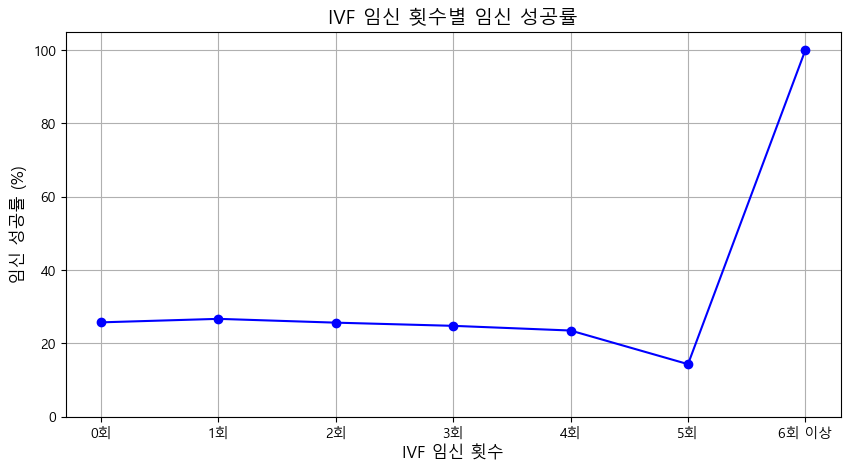

IVF 임신 횟수
0회        25.685096
1회        26.640815
2회        25.604699
3회        24.736048
4회        23.456790
5회        14.285714
6회 이상    100.000000
Name: 임신 성공 여부, dtype: float64

In [138]:
df["IVF 임신 횟수"] = df["IVF 임신 횟수"].astype(str)

ivf_pregnancy_success = df.groupby("IVF 임신 횟수")["임신 성공 여부"].mean() * 100

order = sorted(df["IVF 임신 횟수"].unique(), key=lambda x: (x.isdigit(), x))  # 숫자 순서 정렬

plt.figure(figsize=(10, 5))
plt.plot(ivf_pregnancy_success.index, ivf_pregnancy_success.values, marker="o", linestyle="-", color="blue")
plt.xlabel("IVF 임신 횟수", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("IVF 임신 횟수별 임신 성공률", fontsize=14)
plt.grid(True)
plt.xticks(rotation=0)
plt.ylim(0, max(ivf_pregnancy_success.values) + 5)
plt.show()

ivf_pregnancy_success

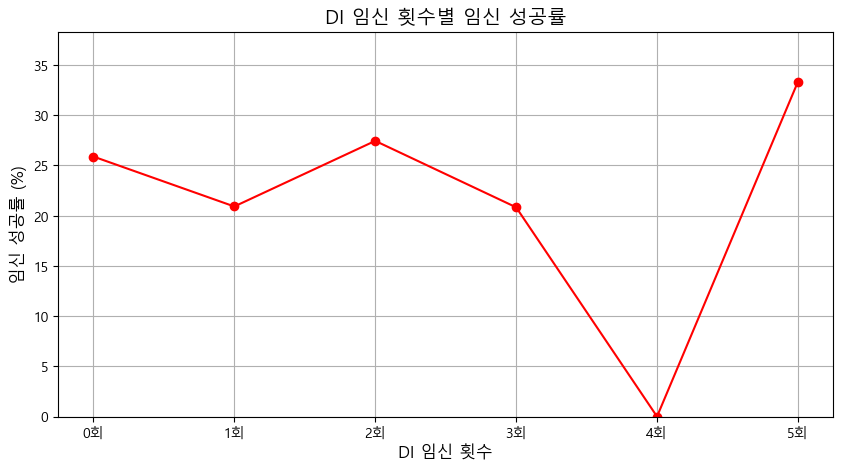

DI 임신 횟수
0회    25.884912
1회    20.914286
2회    27.445652
3회    20.833333
4회     0.000000
5회    33.333333
Name: 임신 성공 여부, dtype: float64

In [139]:
df["DI 임신 횟수"] = df["DI 임신 횟수"].astype(str)

di_pregnancy_success = df.groupby("DI 임신 횟수")["임신 성공 여부"].mean() * 100

order = sorted(df["DI 임신 횟수"].unique(), key=lambda x: (x.isdigit(), x)) 

plt.figure(figsize=(10, 5))
plt.plot(di_pregnancy_success.index, di_pregnancy_success.values, marker="o", linestyle="-", color="red")
plt.xlabel("DI 임신 횟수", fontsize=12)
plt.ylabel("임신 성공률 (%)", fontsize=12)
plt.title("DI 임신 횟수별 임신 성공률", fontsize=14)
plt.grid(True)
plt.xticks(rotation=0)
plt.ylim(0, max(di_pregnancy_success.values) + 5)
plt.show()

di_pregnancy_success

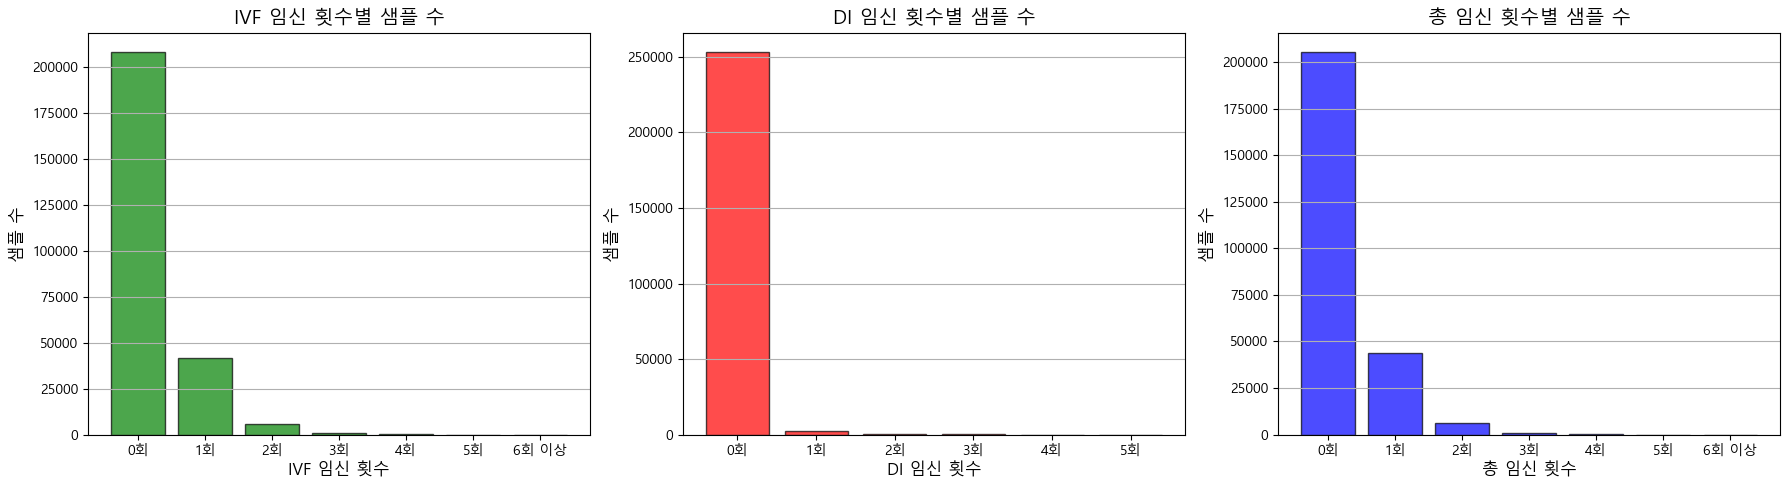

(IVF 임신 횟수
 0회       208292
 1회        41519
 2회         5788
 3회          663
 4회           81
 5회            7
 6회 이상         1
 Name: count, dtype: int64,
 DI 임신 횟수
 0회    253302
 1회      2625
 2회       368
 3회        48
 4회         5
 5회         3
 Name: count, dtype: int64,
 총 임신 횟수
 0회       205426
 1회        43829
 2회         6246
 3회          746
 4회           93
 5회            8
 6회 이상         3
 Name: count, dtype: int64)

In [ ]:
ivf_sample_count = df["IVF 임신 횟수"].value_counts().sort_index()
di_sample_count = df["DI 임신 횟수"].value_counts().sort_index()
total_pregnancy_count = df["총 임신 횟수"].value_counts().sort_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(ivf_sample_count.index, ivf_sample_count.values, color="green", alpha=0.7, edgecolor="black")
axes[0].set_xlabel("IVF 임신 횟수", fontsize=12)
axes[0].set_ylabel("샘플 수", fontsize=12)
axes[0].set_title("IVF 임신 횟수별 샘플 수", fontsize=14)
axes[0].grid(axis="y")

axes[1].bar(di_sample_count.index, di_sample_count.values, color="red", alpha=0.7, edgecolor="black")
axes[1].set_xlabel("DI 임신 횟수", fontsize=12)
axes[1].set_ylabel("샘플 수", fontsize=12)
axes[1].set_title("DI 임신 횟수별 샘플 수", fontsize=14)
axes[1].grid(axis="y")

axes[2].bar(total_pregnancy_count.index, total_pregnancy_count.values, color="blue", alpha=0.7, edgecolor="black")
axes[2].set_xlabel("총 임신 횟수", fontsize=12)
axes[2].set_ylabel("샘플 수", fontsize=12)
axes[2].set_title("총 임신 횟수별 샘플 수", fontsize=14)
axes[2].grid(axis="y")

plt.tight_layout()
plt.show()

ivf_sample_count, di_sample_count, total_pregnancy_count

#### IVF, DI, 총 임신 횟수 모두 증가할수록 샘플 수가 급격히 감소해버림
- IVF나 총 임신 횟수는 1회까지는 어느정도 데이터 있지만 그 이후는 너무적음.
- DI는 1회 이후부터도 너무 적음.
- 사실상 2,3회 이후 데이터는 너무 적어서 이상치로 판단 됨.

=> 이러한 극소수 데이터는 굳이 필요 없어서 제거 해도 될듯

## 이제 출산 횟수 EDA 기릿 36~38번 컬럼

C:\Users\82108\AppData\Local\Temp\ipykernel_10072\1785124186.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(total_birth_success.index, rotation=0)
C:\Users\82108\AppData\Local\Temp\ipykernel_10072\1785124186.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(ivf_birth_success.index, rotation=0)
C:\Users\82108\AppData\Local\Temp\ipykernel_10072\1785124186.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(di_birth_success.index, rotation=0)


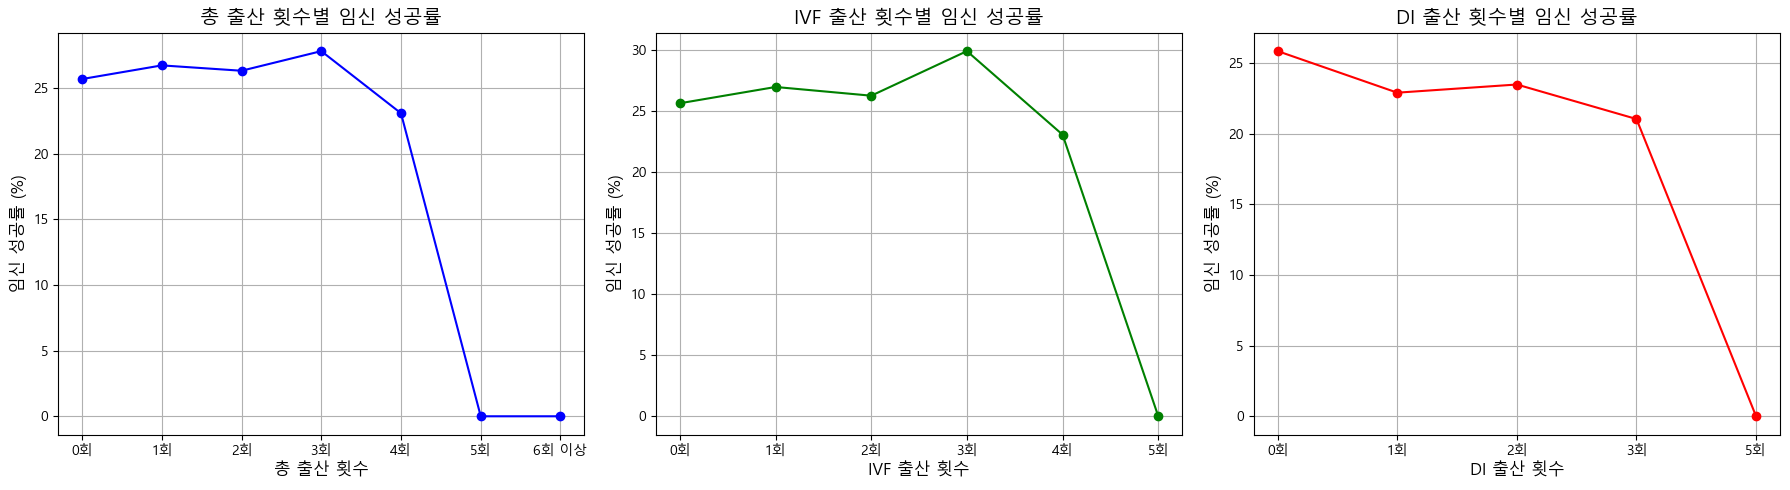

(총 출산 횟수
 0회       25.685068
 1회       26.723967
 2회       26.315789
 3회       27.810651
 4회       23.076923
 5회        0.000000
 6회 이상     0.000000
 Name: 임신 성공 여부, dtype: float64,
 IVF 출산 횟수
 0회    25.654460
 1회    26.988125
 2회    26.274122
 3회    29.927007
 4회    23.076923
 5회     0.000000
 Name: 임신 성공 여부, dtype: float64,
 DI 출산 횟수
 0회    25.861682
 1회    22.918616
 2회    23.497268
 3회    21.052632
 5회     0.000000
 Name: 임신 성공 여부, dtype: float64)

In [151]:
total_birth_success = df.groupby("총 출산 횟수")["임신 성공 여부"].mean() * 100
ivf_birth_success = df.groupby("IVF 출산 횟수")["임신 성공 여부"].mean() * 100
di_birth_success = df.groupby("DI 출산 횟수")["임신 성공 여부"].mean() * 100

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(total_birth_success.index, total_birth_success.values, marker="o", linestyle="-", color="blue")
axes[0].set_xlabel("총 출산 횟수", fontsize=12)
axes[0].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[0].set_title("총 출산 횟수별 임신 성공률", fontsize=14)
axes[0].grid(True)
axes[0].set_xticklabels(total_birth_success.index, rotation=0)

axes[1].plot(ivf_birth_success.index, ivf_birth_success.values, marker="o", linestyle="-", color="green")
axes[1].set_xlabel("IVF 출산 횟수", fontsize=12)
axes[1].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[1].set_title("IVF 출산 횟수별 임신 성공률", fontsize=14)
axes[1].grid(True)
axes[1].set_xticklabels(ivf_birth_success.index, rotation=0)

axes[2].plot(di_birth_success.index, di_birth_success.values, marker="o", linestyle="-", color="red")
axes[2].set_xlabel("DI 출산 횟수", fontsize=12)
axes[2].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[2].set_title("DI 출산 횟수별 임신 성공률", fontsize=14)
axes[2].grid(True)
axes[2].set_xticklabels(di_birth_success.index, rotation=0)

plt.tight_layout()
plt.show()

total_birth_success, ivf_birth_success, di_birth_success

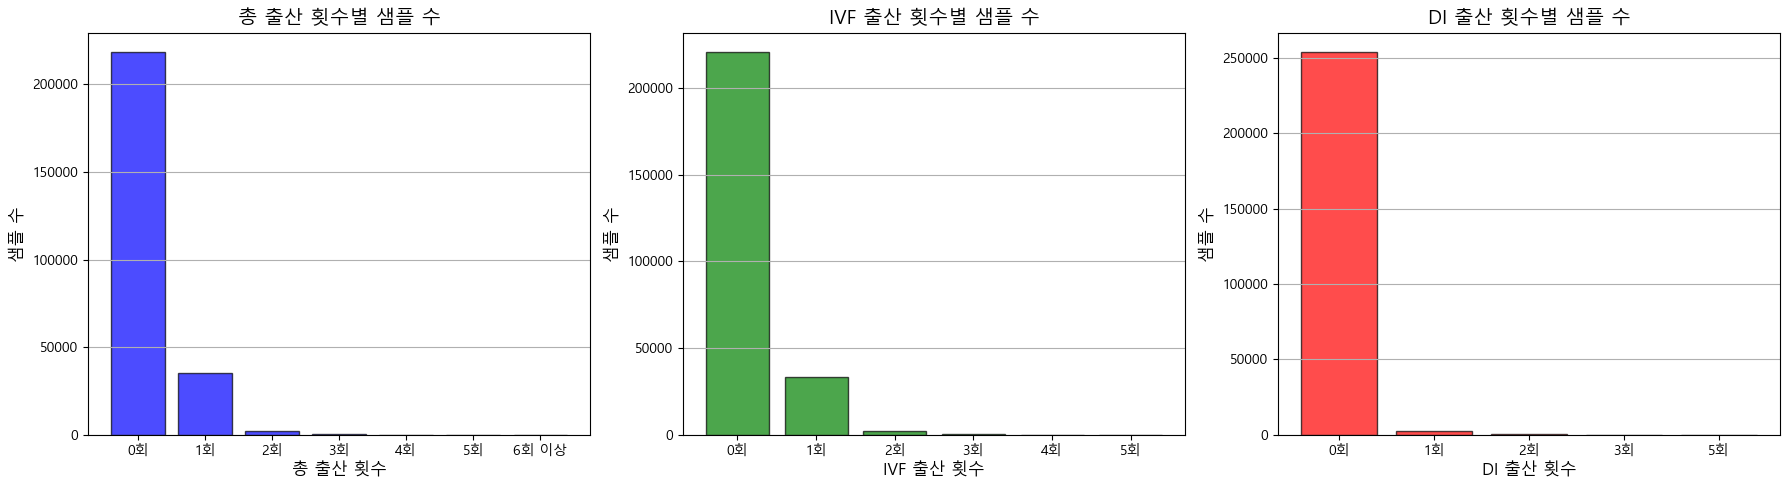

(총 출산 횟수
 0회       218555
 1회        35369
 2회         2242
 3회          169
 4회           13
 5회            1
 6회 이상         2
 Name: count, dtype: int64,
 IVF 출산 횟수
 0회    220831
 1회     33348
 2회      2021
 3회       137
 4회        13
 5회         1
 Name: count, dtype: int64,
 DI 출산 횟수
 0회    254009
 1회      2138
 2회       183
 3회        19
 5회         2
 Name: count, dtype: int64)

In [150]:
total_birth_count = df["총 출산 횟수"].value_counts().sort_index()
ivf_birth_count = df["IVF 출산 횟수"].value_counts().sort_index()
di_birth_count = df["DI 출산 횟수"].value_counts().sort_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(total_birth_count.index, total_birth_count.values, color="blue", alpha=0.7, edgecolor="black")
axes[0].set_xlabel("총 출산 횟수", fontsize=12)
axes[0].set_ylabel("샘플 수", fontsize=12)
axes[0].set_title("총 출산 횟수별 샘플 수", fontsize=14)
axes[0].grid(axis="y")

axes[1].bar(ivf_birth_count.index, ivf_birth_count.values, color="green", alpha=0.7, edgecolor="black")
axes[1].set_xlabel("IVF 출산 횟수", fontsize=12)
axes[1].set_ylabel("샘플 수", fontsize=12)
axes[1].set_title("IVF 출산 횟수별 샘플 수", fontsize=14)
axes[1].grid(axis="y")

axes[2].bar(di_birth_count.index, di_birth_count.values, color="red", alpha=0.7, edgecolor="black")
axes[2].set_xlabel("DI 출산 횟수", fontsize=12)
axes[2].set_ylabel("샘플 수", fontsize=12)
axes[2].set_title("DI 출산 횟수별 샘플 수", fontsize=14)
axes[2].grid(axis="y")

plt.tight_layout()
plt.show()

total_birth_count, ivf_birth_count, di_birth_count

출산 횟수도 마찬가지로 2회 이후로는 데이터 개수가 너무 작아서 사용하기에 너무 쓰잘데기 없다고 생각함\
주로 쓸만한 데이터는 0회 OR 1회라고 생각해요.

## 이제 39~46번 컬럼인 배아 개수 부터 갈게욘

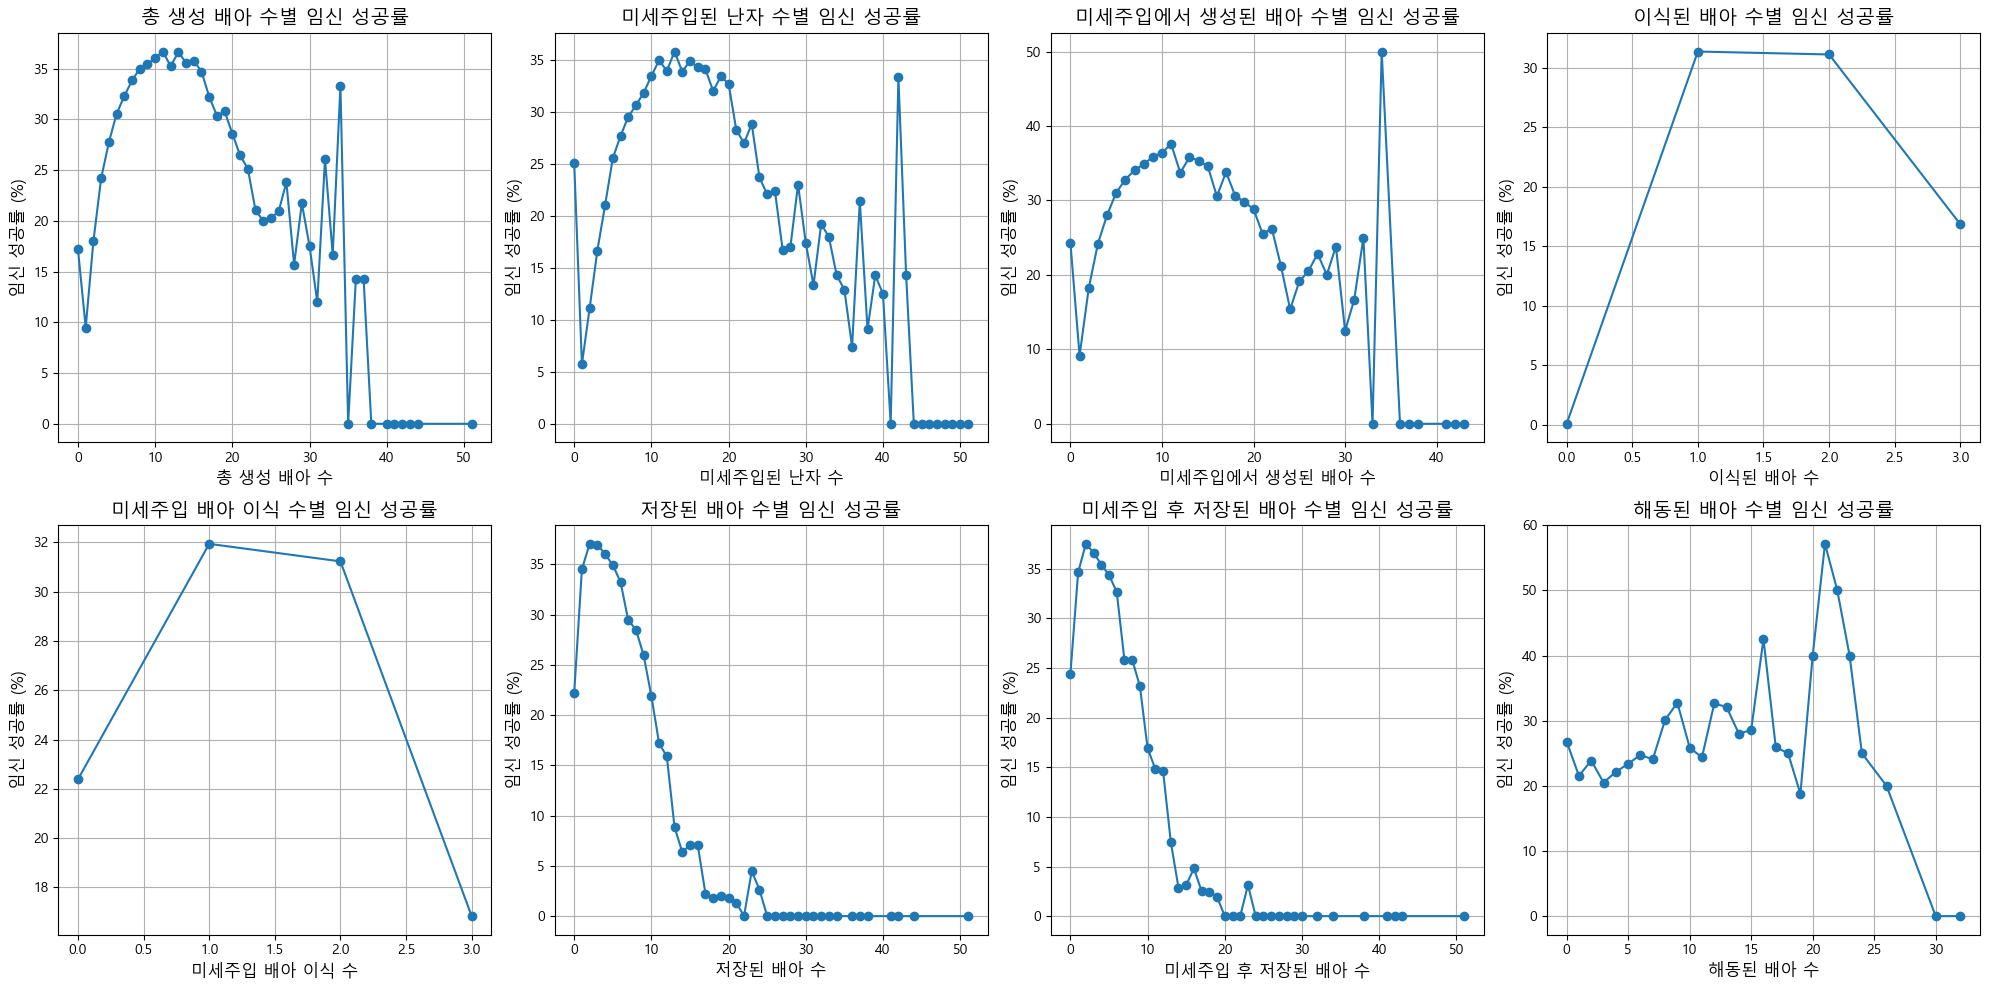

총 생성 배아 수  미세주입된 난자 수  미세주입에서 생성된 배아 수  이식된 배아 수  미세주입 배아 이식 수  저장된 배아 수  미세주입 후 저장된 배아 수  해동된 배아 수
0.0        0.0         0.0              0.0       0.0           0.0       0.0              0.0         0.031847
                                                                                           1.0         0.079365
                                                                                           2.0         0.000000
                                                                                           3.0         0.000000
                                                                                           4.0         0.000000
                                                                                                         ...   
44.0       0.0         0.0              0.0       0.0           10.0      0.0              0.0         0.000000
                                                                34.0      0.0              0.0         0.000000
    

In [ ]:
embryo_columns = [
    "총 생성 배아 수", "미세주입된 난자 수", "미세주입에서 생성된 배아 수", 
    "이식된 배아 수", "미세주입 배아 이식 수", "저장된 배아 수", 
    "미세주입 후 저장된 배아 수", "해동된 배아 수"
]

embryo_success_rates = df.groupby(embryo_columns)["임신 성공 여부"].mean() * 100

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(embryo_columns):
    success_rates = df.groupby(col)["임신 성공 여부"].mean() * 100
    axes[i].plot(success_rates.index, success_rates.values, marker="o", linestyle="-")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("임신 성공률 (%)", fontsize=12)
    axes[i].set_title(f"{col}별 임신 성공률", fontsize=14)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

embryo_success_rates

1. 총 생성 배아 수
- 10개까지는 증가할수록 임신 성공률이 상승한다.
- 10개 이후는 변동성이 엄청 커진다. 뒤로 갈수록 이상치 처리 필요해 보임.

2. 미세 주입된 난자 수
-  10개까지는 성공률이 증가함.
- 이후 점차 감소하면서 변동성이 커짐. 데이터가 적어서 신뢰도가 낮아보임.

3. 미세주입에서 생성된 배아 수
- 8~12개까지 성공률이 증가하다가 감소함.
- 이후 감소함.

4. 이식된 배아 수
- 이식된 배아 수가 1~2개 일때 성공률이 높음.
- 2개 이후부터는 급격히 감소함.

5. 미세주입 배아 이식 수
- 1~2개 일 때 성공률이 가장 높음.
- 2개 이후부터는 4번이랑 같이 급격히 감소함.

6. 저장된 배아 수, 미세 주입 후 저장된 배아 수
- 그래프가 거의 비슷함.
- 약1~3개까지는 성공률이 높다가 그 이후로 성공률이 매우 감소함.

7. 해동된 배아 수
- 배아 개수에 따른 성공률 변동성이 큼
- 임신 성공률과 그리 관계성이 있지 않아 보임요.

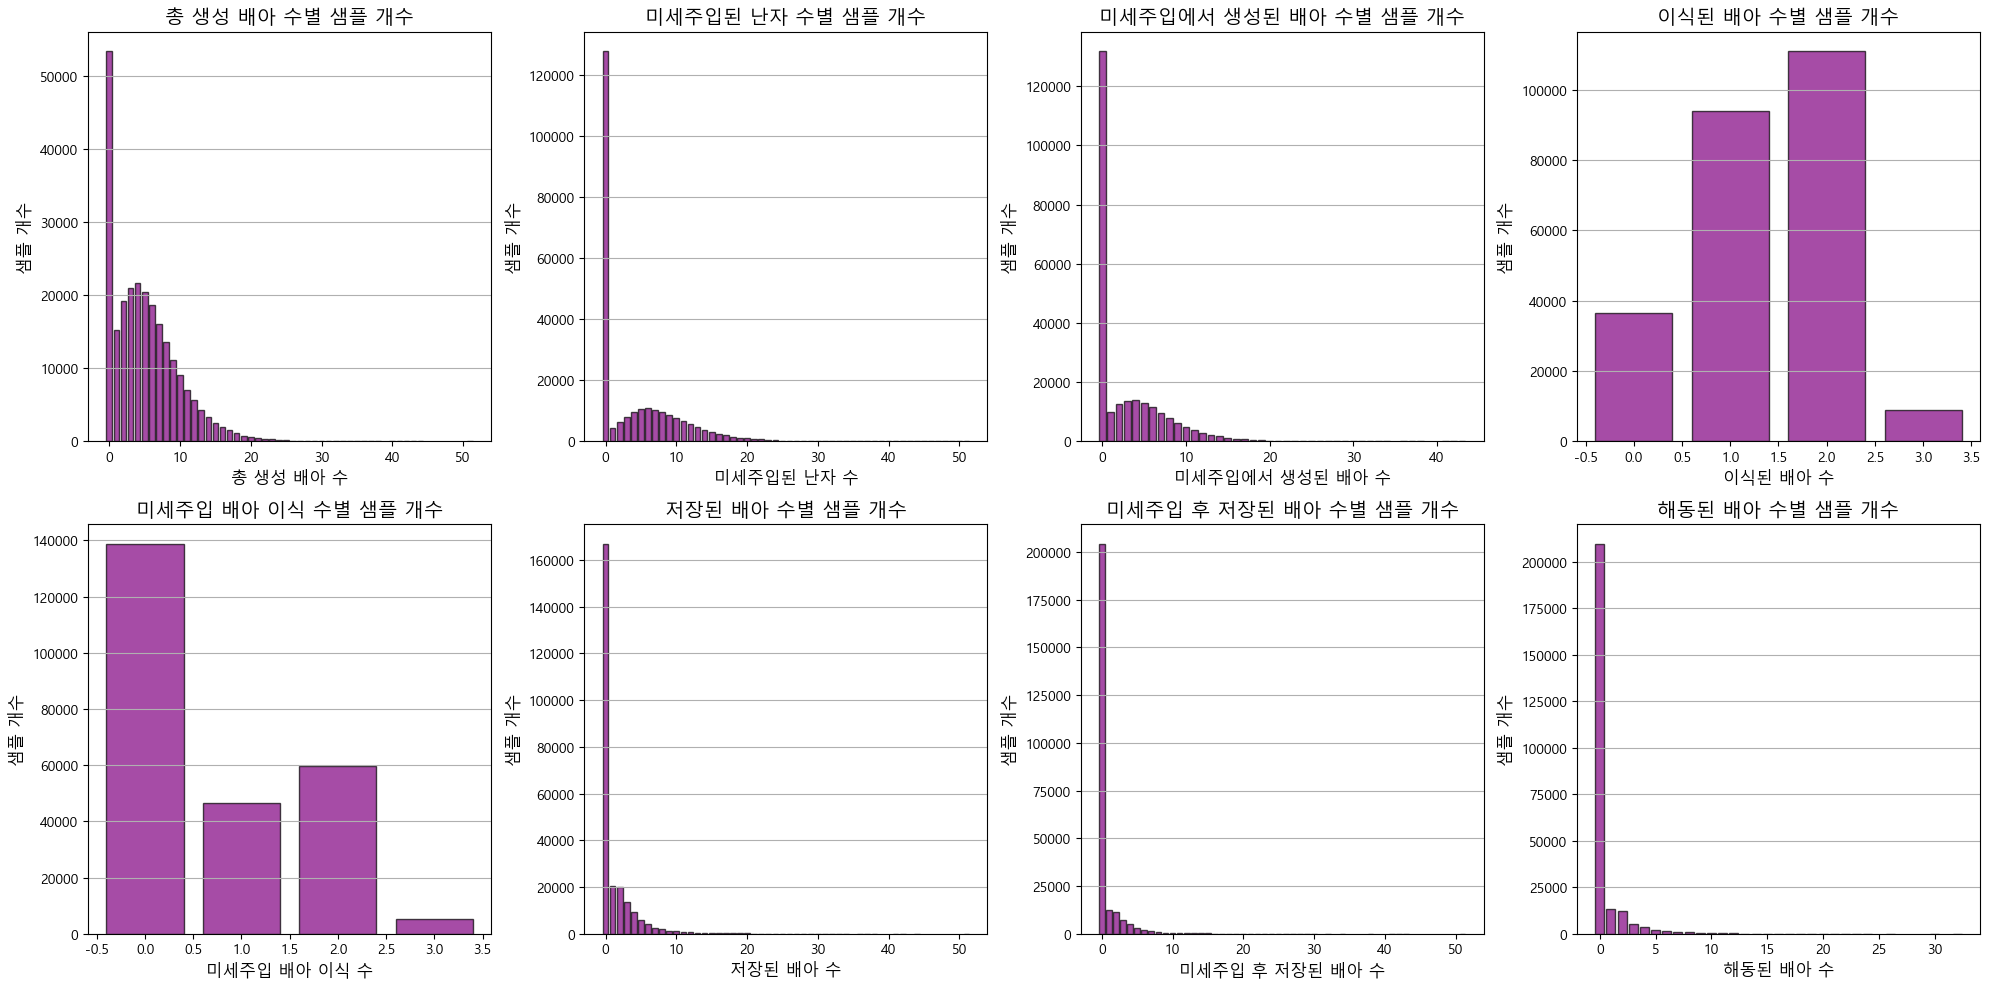

{'총 생성 배아 수': 총 생성 배아 수
 0.0     53349
 1.0     15223
 2.0     19190
 3.0     20952
 4.0     21612
 5.0     20410
 6.0     18623
 7.0     16029
 8.0     13620
 9.0     11131
 10.0     9065
 11.0     7090
 12.0     5720
 13.0     4321
 14.0     3360
 15.0     2516
 16.0     1916
 17.0     1504
 18.0     1117
 19.0      799
 20.0      640
 21.0      461
 22.0      354
 23.0      266
 24.0      195
 25.0      163
 26.0      105
 27.0       84
 28.0       51
 29.0       46
 30.0       40
 31.0       25
 32.0       23
 33.0       12
 34.0       15
 35.0        4
 36.0        7
 37.0        7
 38.0        3
 40.0        1
 41.0        2
 42.0        3
 43.0        1
 44.0        3
 51.0        2
 Name: count, dtype: int64,
 '미세주입된 난자 수': 미세주입된 난자 수
 0.0     127669
 1.0       4537
 2.0       6294
 3.0       7912
 4.0       9622
 5.0      10619
 6.0      11075
 7.0      10411
 8.0       9699
 9.0       8606
 10.0      7748
 11.0      6528
 12.0      5622
 13.0      4651
 14.0      3842
 15.0  

In [157]:
embryo_sample_counts = {}

for col in [
    "총 생성 배아 수", "미세주입된 난자 수", "미세주입에서 생성된 배아 수", 
    "이식된 배아 수", "미세주입 배아 이식 수", "저장된 배아 수", 
    "미세주입 후 저장된 배아 수", "해동된 배아 수"
]:
    embryo_sample_counts[col] = df[col].value_counts().sort_index()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, (col, counts) in enumerate(embryo_sample_counts.items()):
    axes[i].bar(counts.index, counts.values, color="purple", alpha=0.7, edgecolor="black")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("샘플 개수", fontsize=12)
    axes[i].set_title(f"{col}별 샘플 개수", fontsize=14)
    axes[i].grid(axis="y")

plt.tight_layout()
plt.show()

embryo_sample_counts

1. 총 생성 배아 수: 약 30개 이상부터 제거 가능
2. 미세주입된 난자 수: 약 30개 이상부터 제거 가능
3. 미세주입에서 생성된 배아 수: 25개 이상부터 제거 가능
4. 이식된 배아 수: 제거 x
5. 미세주입 배아 이식 수: 제거 x
6. 저장된 배아 수 & 미세주입 후 저장된 배아 수: 25개 이상부터 제거 가능
7. 해동된 배아 수: 20개 이상부터 제거 가능

특정 값 이후 부터는 노이즈 데이터로 포함되어 모델 성능을 방해할 수 있음.

## 46,47 해동된 배아 및 난자

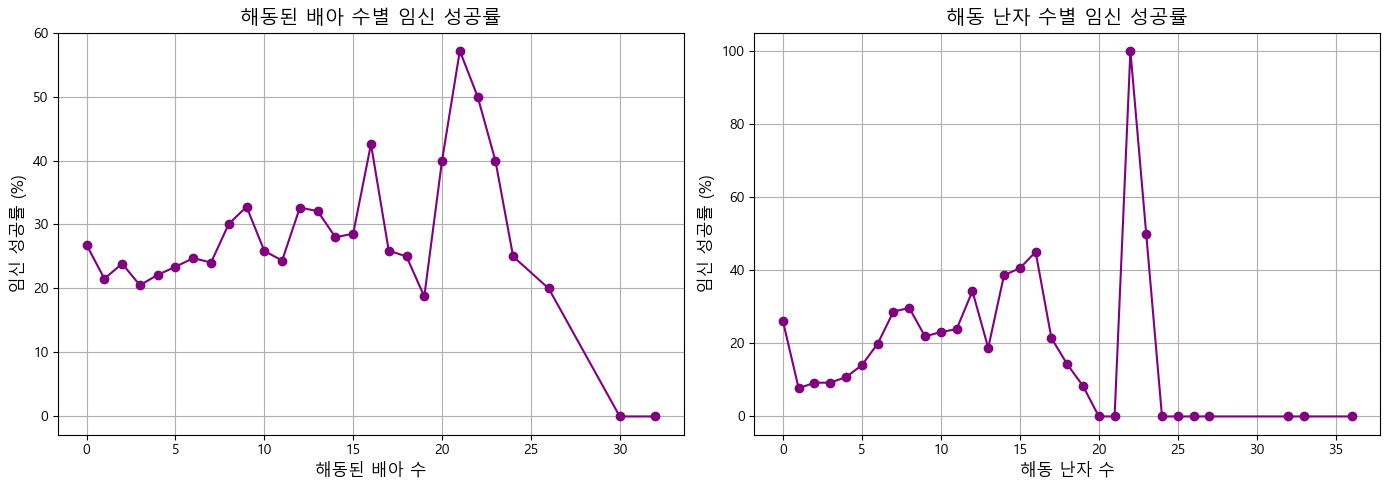

{'해동된 배아 수': 해동된 배아 수
 0.0     26.798140
 1.0     21.530331
 2.0     23.875776
 3.0     20.504264
 4.0     22.132097
 5.0     23.386680
 6.0     24.749833
 7.0     24.053724
 8.0     30.093209
 9.0     32.766990
 10.0    25.872093
 11.0    24.358974
 12.0    32.638889
 13.0    32.098765
 14.0    28.000000
 15.0    28.571429
 16.0    42.553191
 17.0    25.925926
 18.0    25.000000
 19.0    18.750000
 20.0    40.000000
 21.0    57.142857
 22.0    50.000000
 23.0    40.000000
 24.0    25.000000
 26.0    20.000000
 30.0     0.000000
 32.0     0.000000
 Name: 임신 성공 여부, dtype: float64,
 '해동 난자 수': 해동 난자 수
 0.0      26.183456
 1.0       7.692308
 2.0       9.230769
 3.0       9.230769
 4.0      10.769231
 5.0      14.018692
 6.0      19.883041
 7.0      28.671329
 8.0      29.680365
 9.0      21.904762
 10.0     23.076923
 11.0     23.880597
 12.0     34.285714
 13.0     18.750000
 14.0     38.636364
 15.0     40.540541
 16.0     45.000000
 17.0     21.428571
 18.0     14.285714
 19.0      8.

In [160]:
thawing_columns = ["해동된 배아 수", "해동 난자 수"]

thawing_success_rates = {col: df.groupby(col)["임신 성공 여부"].mean() * 100 for col in thawing_columns}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, (col, success_rates) in enumerate(thawing_success_rates.items()):
    axes[i].plot(success_rates.index, success_rates.values, marker="o", linestyle="-", color="purple")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("임신 성공률 (%)", fontsize=12)
    axes[i].set_title(f"{col}별 임신 성공률", fontsize=14)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

thawing_success_rates

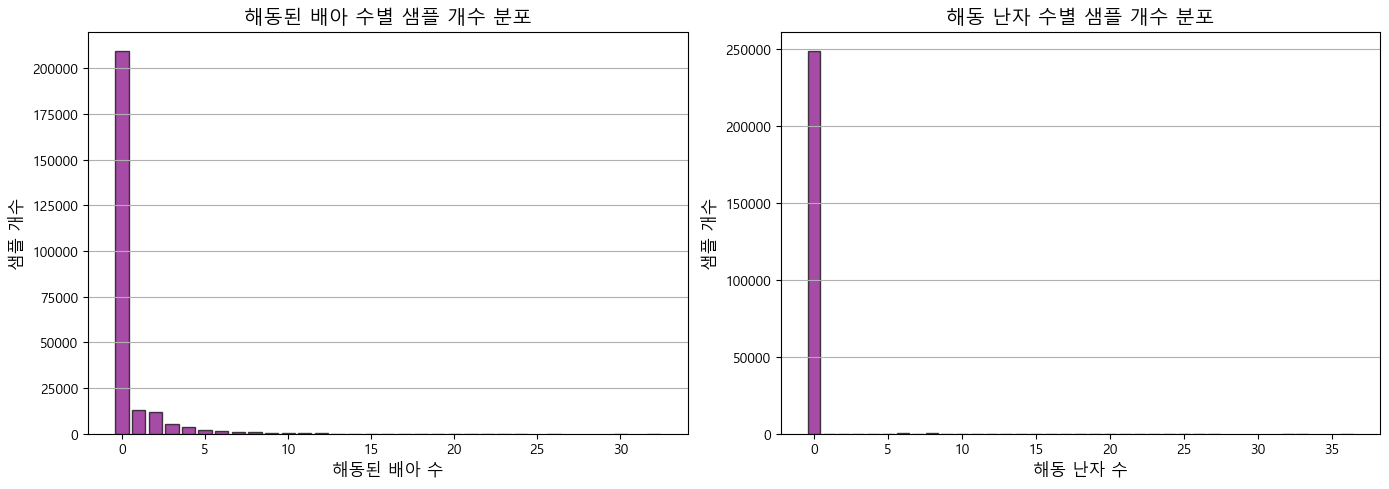

{'해동된 배아 수': 해동된 배아 수
 0.0     209675
 1.0      13056
 2.0      12075
 3.0       5394
 4.0       3452
 5.0       1937
 6.0       1499
 7.0        819
 8.0        751
 9.0        412
 10.0       344
 11.0       156
 12.0       144
 13.0        81
 14.0        75
 15.0        42
 16.0        47
 17.0        27
 18.0        24
 19.0        16
 20.0         5
 21.0         7
 22.0         6
 23.0         5
 24.0         4
 26.0         5
 30.0         1
 32.0         1
 Name: count, dtype: int64,
 '해동 난자 수': 해동 난자 수
 0.0     248615
 1.0         26
 2.0         65
 3.0         65
 4.0        130
 5.0        107
 6.0        171
 7.0        143
 8.0        219
 9.0        105
 10.0        91
 11.0        67
 12.0        70
 13.0        32
 14.0        44
 15.0        37
 16.0        20
 17.0        14
 18.0         7
 19.0        12
 20.0         5
 21.0         2
 22.0         1
 23.0         2
 24.0         3
 25.0         1
 26.0         2
 27.0         1
 32.0         1
 33.0         1
 3

In [ ]:
thawing_sample_counts = {
    "해동된 배아 수": df["해동된 배아 수"].value_counts().sort_index(),
    "해동 난자 수": df["해동 난자 수"].value_counts().sort_index(),
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, (col, counts) in enumerate(thawing_sample_counts.items()):
    axes[i].bar(counts.index, counts.values, color="purple", alpha=0.7, edgecolor="black")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("샘플 개수", fontsize=12)
    axes[i].set_title(f"{col}별 샘플 개수 분포", fontsize=14)
    axes[i].grid(axis="y")

plt.tight_layout()
plt.show()

thawing_sample_counts

1. 해동된 배아 수와 임신 성공률
- 약 18개 이상 부터는 성공 변동성이 커지고 데이터 개수도 매우적음.
- 20개 이후 높은 성공률은 샘플 수가 매우 적어서 발생한 것으로 판단됨.
- 20개 이상 부터는 변동성이 커서 제거할지 고려, 30개 이상은 성공률이 0%라 제거하는게 좋을듯.

2. 해동 난자 수에 따른 임신 성공률
- 데이터 개수가 0개에 압도적으로 분포함. 
- 20개 이후 변동성이 크므로 20개 이상에서 제거 고려. 아니면 25개 이상부터는 성공률이 0%라 여기부터는 걍 다 제거하는게 좋을듯.

## 48~52 컬럼 난자 수 관련 컬럼

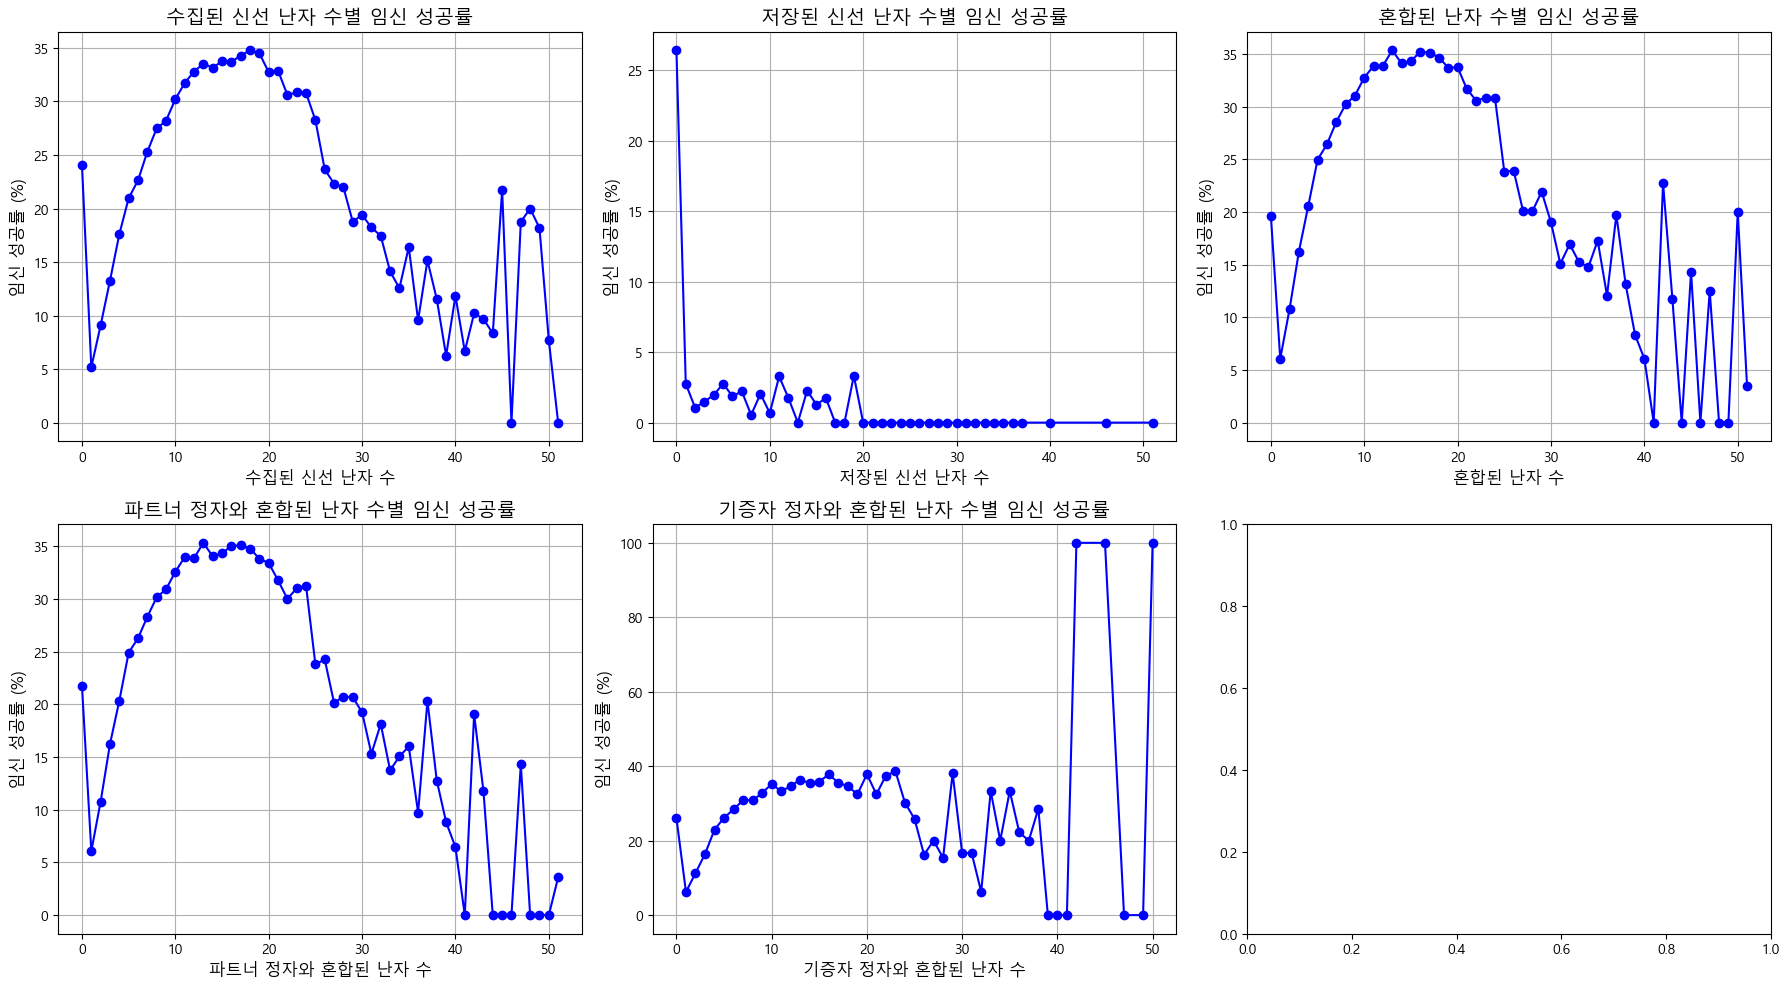

{'수집된 신선 난자 수': 수집된 신선 난자 수
 0.0     24.048658
 1.0      5.170993
 2.0      9.097966
 3.0     13.265431
 4.0     17.600000
 5.0     20.962140
 6.0     22.626407
 7.0     25.305530
 8.0     27.482748
 9.0     28.197000
 10.0    30.218703
 11.0    31.719533
 12.0    32.800219
 13.0    33.528936
 14.0    33.170840
 15.0    33.744064
 16.0    33.702391
 17.0    34.287697
 18.0    34.779976
 19.0    34.501481
 20.0    32.738780
 21.0    32.879168
 22.0    30.614915
 23.0    30.847096
 24.0    30.801944
 25.0    28.259286
 26.0    23.648649
 27.0    22.326675
 28.0    21.978022
 29.0    18.772563
 30.0    19.400000
 31.0    18.230563
 32.0    17.441860
 33.0    14.126394
 34.0    12.556054
 35.0    16.393443
 36.0     9.554140
 37.0    15.151515
 38.0    11.538462
 39.0     6.250000
 40.0    11.842105
 41.0     6.666667
 42.0    10.204082
 43.0     9.677419
 44.0     8.333333
 45.0    21.739130
 46.0     0.000000
 47.0    18.750000
 48.0    20.000000
 49.0    18.181818
 50.0     7.692308
 51

In [165]:
fertility_columns = [
    "수집된 신선 난자 수", "저장된 신선 난자 수", "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수", "기증자 정자와 혼합된 난자 수"
]

fertility_success_rates = {col: df.groupby(col)["임신 성공 여부"].mean() * 100 for col in fertility_columns}

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (col, success_rates) in enumerate(fertility_success_rates.items()):
    axes[i].plot(success_rates.index, success_rates.values, marker="o", linestyle="-", color="blue")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("임신 성공률 (%)", fontsize=12)
    axes[i].set_title(f"{col}별 임신 성공률", fontsize=14)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 임신 성공률 데이터 출력
fertility_success_rates

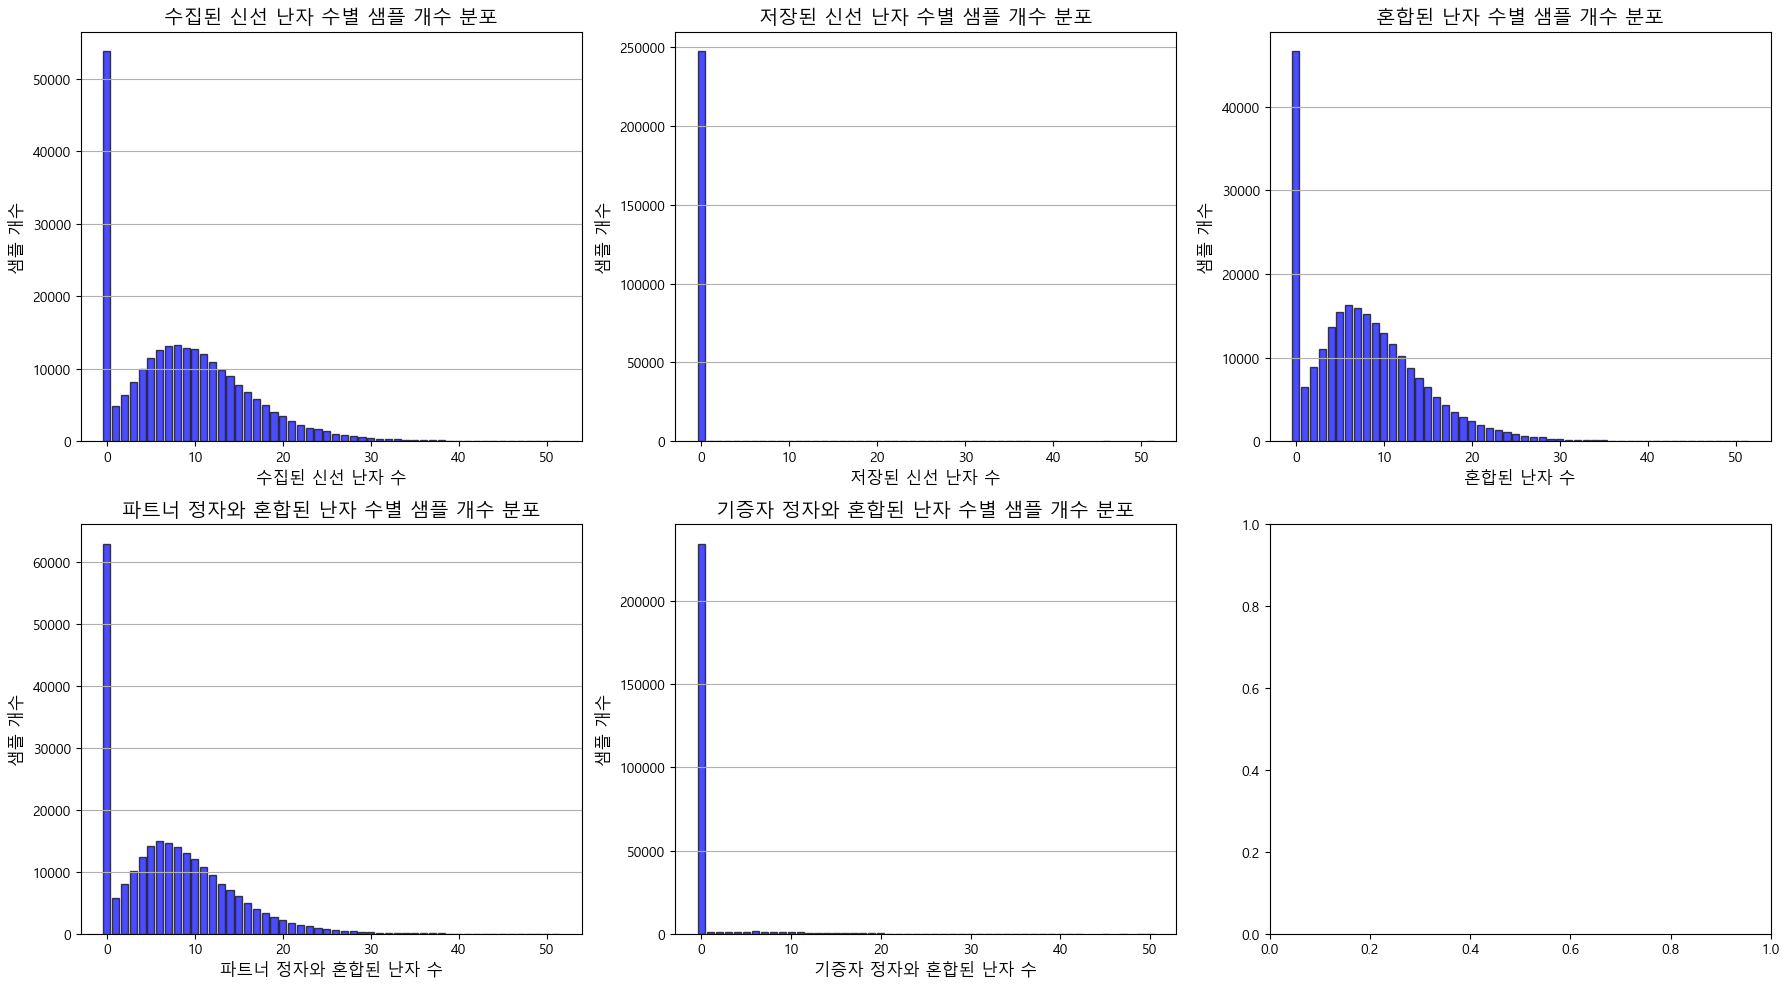

{'수집된 신선 난자 수': 수집된 신선 난자 수
 0.0     53845
 1.0      4854
 2.0      6441
 3.0      8149
 4.0     10000
 5.0     11516
 6.0     12618
 7.0     13092
 8.0     13332
 9.0     12934
 10.0    12757
 11.0    11980
 12.0    10942
 13.0     9884
 14.0     9026
 15.0     7791
 16.0     6774
 17.0     5763
 18.0     4954
 19.0     4052
 20.0     3476
 21.0     2789
 22.0     2293
 23.0     1877
 24.0     1646
 25.0     1373
 26.0     1036
 27.0      851
 28.0      728
 29.0      554
 30.0      500
 31.0      373
 32.0      344
 33.0      269
 34.0      223
 35.0      183
 36.0      157
 37.0      132
 38.0      104
 39.0       64
 40.0       76
 41.0       45
 42.0       49
 43.0       31
 44.0       24
 45.0       23
 46.0       26
 47.0       16
 48.0        5
 49.0       11
 50.0       13
 51.0       65
 Name: count, dtype: int64,
 '저장된 신선 난자 수': 저장된 신선 난자 수
 0.0     247394
 1.0        145
 2.0        189
 3.0        201
 4.0        204
 5.0        217
 6.0        214
 7.0        180
 8.0    

In [166]:
fertility_sample_counts = {col: df[col].value_counts().sort_index() for col in fertility_columns}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (col, counts) in enumerate(fertility_sample_counts.items()):
    axes[i].bar(counts.index, counts.values, color="blue", alpha=0.7, edgecolor="black")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("샘플 개수", fontsize=12)
    axes[i].set_title(f"{col}별 샘플 개수 분포", fontsize=14)
    axes[i].grid(axis="y")

plt.tight_layout()
plt.show()

fertility_sample_counts

1. 수집된 신선 난자 수
- 대략 40개 이상부터 변동성 개심하고 데이터 개수도 적음. 이상치 가능성 높음. 45개 이상부터는 제거해도 될듯.

2. 저장된 신선 난자 수
- 0개가 너무 많고, 1~10개 사이 샘플 수가 급격히 적음 (약 200개 내외).
- 20개 이상에서는 거의 데이터가 없음.
- 임신 성공과 큰 연관 없어 보임.

3. 혼합된 난자 수
- 10~15개 구간에서 임신 성공률이 높고 15개 이상부터 점진적으로 감소.
- 50개 이상에서는 거의 성공률이 0%
- 40개 이상은 이상치로 제거.

4. 파트너 정자와 혼합된 난자 수
- 얘도 혼합된 난자랑 거의 유사함
- 40개 이상은 이상치로 제거해야 할듯.

5. 기증자 정자와 혼합된 난자 수
- 뭔가 관련성이 거의 없음.
- 데이터도 10개 이상부터는 거의 없음.
- 30개 이후 변동성 큼. 이거는 제거해야 할듯.

=> 50개 이상부터 이상치가 많음\
=> 저장된 신선 난자 수와 기증 정자 사용 여부는 크게 관련 없어 보임.

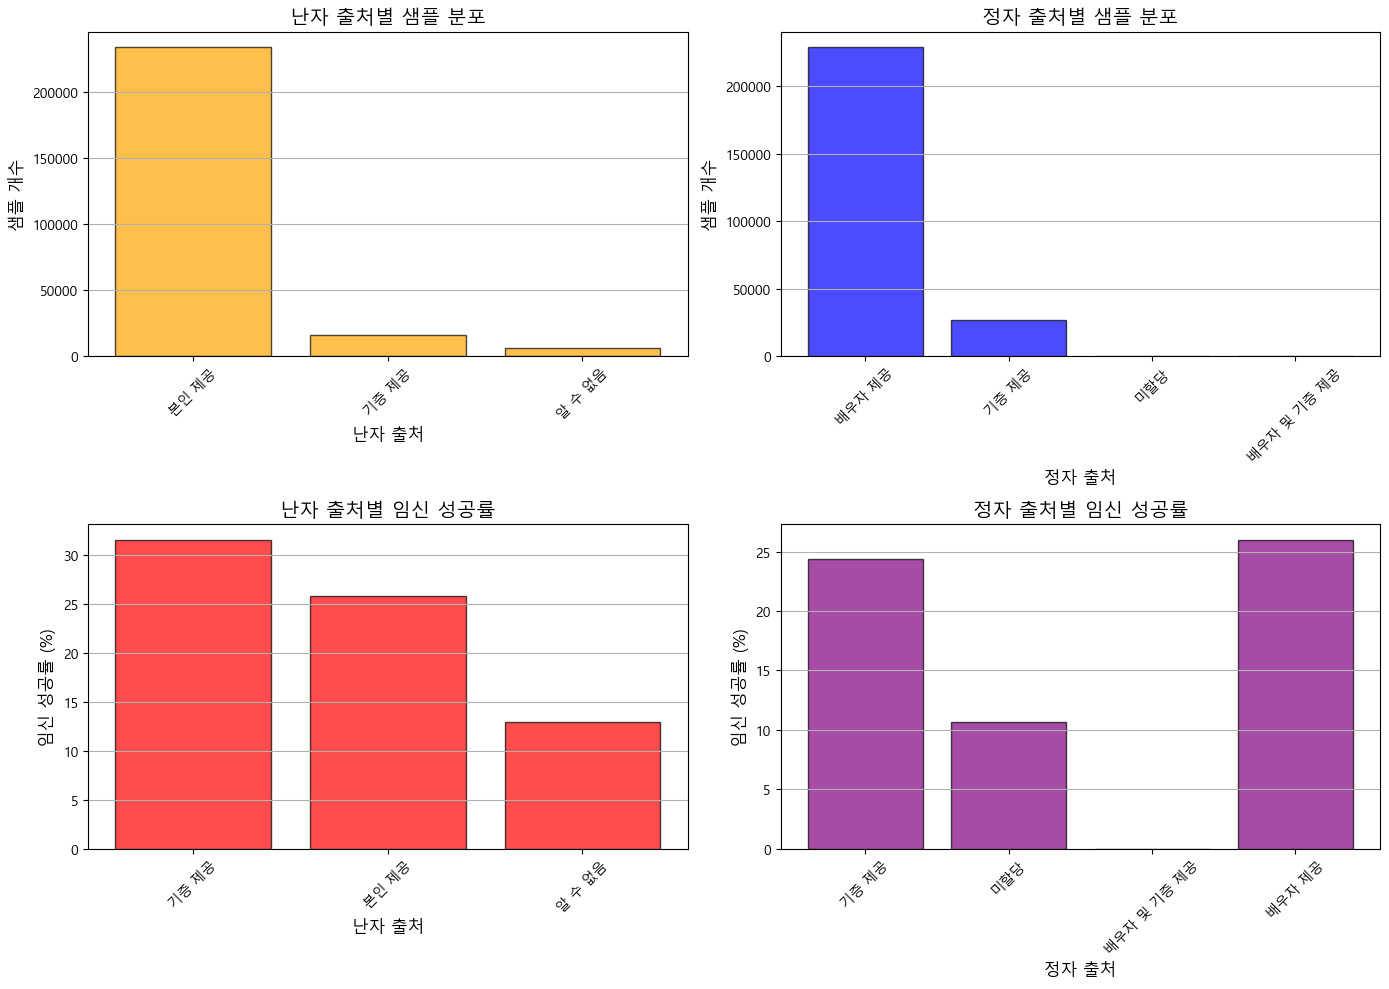

(난자 출처
 본인 제공     234291
 기증 제공      15769
 알 수 없음      6291
 Name: count, dtype: int64,
 정자 출처
 배우자 제공         229199
 기증 제공           27016
 미할당               122
 배우자 및 기증 제공        14
 Name: count, dtype: int64,
 난자 출처
 기증 제공     31.542901
 본인 제공     25.798259
 알 수 없음    12.891432
 Name: 임신 성공 여부, dtype: float64,
 정자 출처
 기증 제공          24.374445
 미할당            10.655738
 배우자 및 기증 제공     0.000000
 배우자 제공         26.016693
 Name: 임신 성공 여부, dtype: float64)

In [170]:
egg_source_counts = df["난자 출처"].value_counts()
sperm_source_counts = df["정자 출처"].value_counts()

egg_source_success_rate = df.groupby("난자 출처")["임신 성공 여부"].mean() * 100
sperm_source_success_rate = df.groupby("정자 출처")["임신 성공 여부"].mean() * 100

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].bar(egg_source_counts.index, egg_source_counts.values, color="orange", alpha=0.7, edgecolor="black")
axes[0, 0].set_xlabel("난자 출처", fontsize=12)
axes[0, 0].set_ylabel("샘플 개수", fontsize=12)
axes[0, 0].set_title("난자 출처별 샘플 분포", fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis="y")

axes[0, 1].bar(sperm_source_counts.index, sperm_source_counts.values, color="blue", alpha=0.7, edgecolor="black")
axes[0, 1].set_xlabel("정자 출처", fontsize=12)
axes[0, 1].set_ylabel("샘플 개수", fontsize=12)
axes[0, 1].set_title("정자 출처별 샘플 분포", fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis="y")

axes[1, 0].bar(egg_source_success_rate.index, egg_source_success_rate.values, color="red", alpha=0.7, edgecolor="black")
axes[1, 0].set_xlabel("난자 출처", fontsize=12)
axes[1, 0].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[1, 0].set_title("난자 출처별 임신 성공률", fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis="y")

axes[1, 1].bar(sperm_source_success_rate.index, sperm_source_success_rate.values, color="purple", alpha=0.7, edgecolor="black")
axes[1, 1].set_xlabel("정자 출처", fontsize=12)
axes[1, 1].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[1, 1].set_title("정자 출처별 임신 성공률", fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis="y")

plt.tight_layout()
plt.show()

egg_source_counts, sperm_source_counts, egg_source_success_rate, sperm_source_success_rate

1. 난자 출처 분석
- 대부분의 난자는 "본인 제공"임. 나머지 기증 받은거랑 알수 없는거는 너무 적음.
- 성공률은 기증 난자가 31%, 본인 제공 25%, 알 수 없는거 12%임. 난자 출처에 따라 성공률이 갈림. 연관성이 있음.

2. 정자 출처 분석
- 대부분의 정자는 "배우자 제공"임, 나머지는 기증 or 미할당 or 배우자 및 기증 제공입니다.
- 성공률은 배우자 제공 및 기증 받은 정자가 비슷하고 미할당은 10%, 배우자및 기증 제공은 0%로 의미가 없음.

-> 배우자 및 기증 제공 데이터는 분석 가치가 낮아 제거해도 될듯.\
-> 추가적으로 미할당이나 알 수 없음도 가치가 있는지는 애매함.

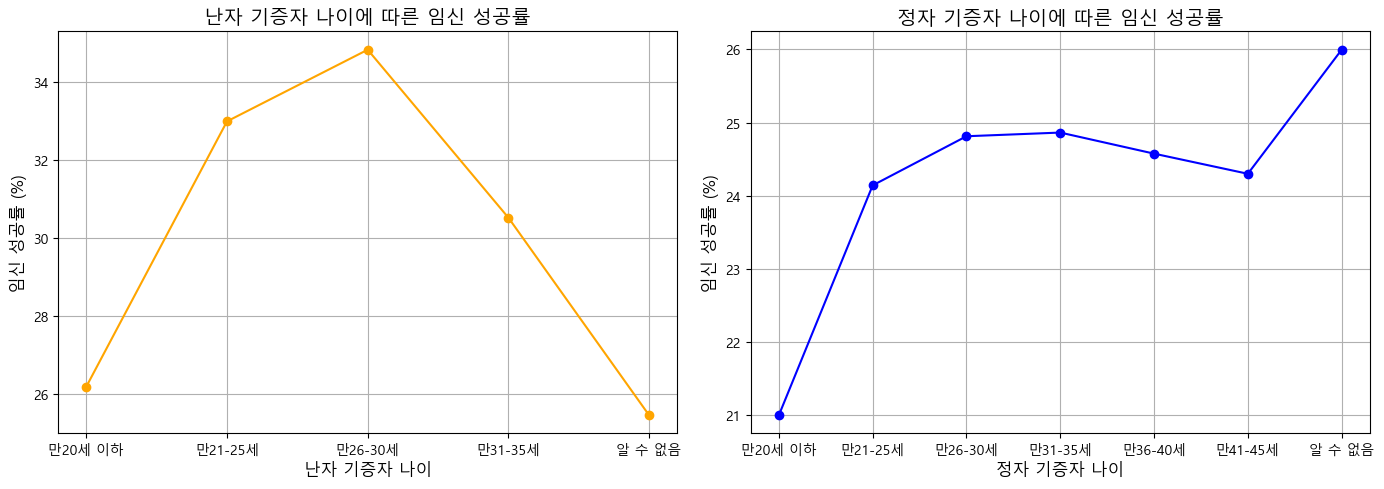

(난자 기증자 나이
 만20세 이하    26.190476
 만21-25세    32.990574
 만26-30세    34.827170
 만31-35세    30.521521
 알 수 없음     25.457854
 Name: 임신 성공 여부, dtype: float64,
 정자 기증자 나이
 만20세 이하    20.993440
 만21-25세    24.139756
 만26-30세    24.812179
 만31-35세    24.862553
 만36-40세    24.574025
 만41-45세    24.298337
 알 수 없음     25.996668
 Name: 임신 성공 여부, dtype: float64)

In [171]:
egg_donor_age_success = df.groupby("난자 기증자 나이")["임신 성공 여부"].mean() * 100
sperm_donor_age_success = df.groupby("정자 기증자 나이")["임신 성공 여부"].mean() * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(egg_donor_age_success.index, egg_donor_age_success.values, marker="o", linestyle="-", color="orange")
axes[0].set_xlabel("난자 기증자 나이", fontsize=12)
axes[0].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[0].set_title("난자 기증자 나이에 따른 임신 성공률", fontsize=14)
axes[0].grid(True)

axes[1].plot(sperm_donor_age_success.index, sperm_donor_age_success.values, marker="o", linestyle="-", color="blue")
axes[1].set_xlabel("정자 기증자 나이", fontsize=12)
axes[1].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[1].set_title("정자 기증자 나이에 따른 임신 성공률", fontsize=14)
axes[1].grid(True)

plt.tight_layout()
plt.show()

egg_donor_age_success, sperm_donor_age_success

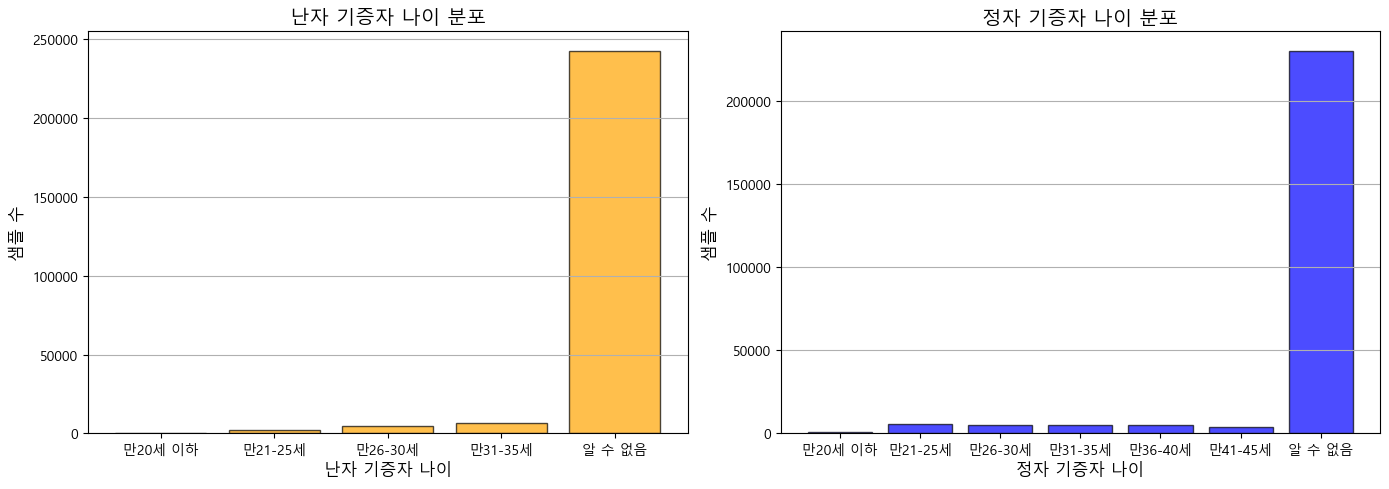

(난자 기증자 나이
 만20세 이하       294
 만21-25세      2334
 만26-30세      4976
 만31-35세      6366
 알 수 없음     242381
 Name: count, dtype: int64,
 정자 기증자 나이
 만20세 이하      1067
 만21-25세      5667
 만26-30세      5058
 만31-35세      4911
 만36-40세      5282
 만41-45세      3848
 알 수 없음     230518
 Name: count, dtype: int64)

In [172]:
egg_donor_age_counts = df["난자 기증자 나이"].value_counts().sort_index()
sperm_donor_age_counts = df["정자 기증자 나이"].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(egg_donor_age_counts.index, egg_donor_age_counts.values, color="orange", alpha=0.7, edgecolor="black")
axes[0].set_xlabel("난자 기증자 나이", fontsize=12)
axes[0].set_ylabel("샘플 수", fontsize=12)
axes[0].set_title("난자 기증자 나이 분포", fontsize=14)
axes[0].grid(axis="y")

axes[1].bar(sperm_donor_age_counts.index, sperm_donor_age_counts.values, color="blue", alpha=0.7, edgecolor="black")
axes[1].set_xlabel("정자 기증자 나이", fontsize=12)
axes[1].set_ylabel("샘플 수", fontsize=12)
axes[1].set_title("정자 기증자 나이 분포", fontsize=14)
axes[1].grid(axis="y")

plt.tight_layout()
plt.show()

egg_donor_age_counts, sperm_donor_age_counts

- 대부분의 난자 및 정자 데이터 기증자 나이를 알 수 없으며 임신 성공률과 관계성도 크게 없어 보임.
- 기증자 나이 변수는 걍 제거하는게 맞는 것 같음.

## 57~59 동결 배아, 신선 배아, 기증 배아 컬럼

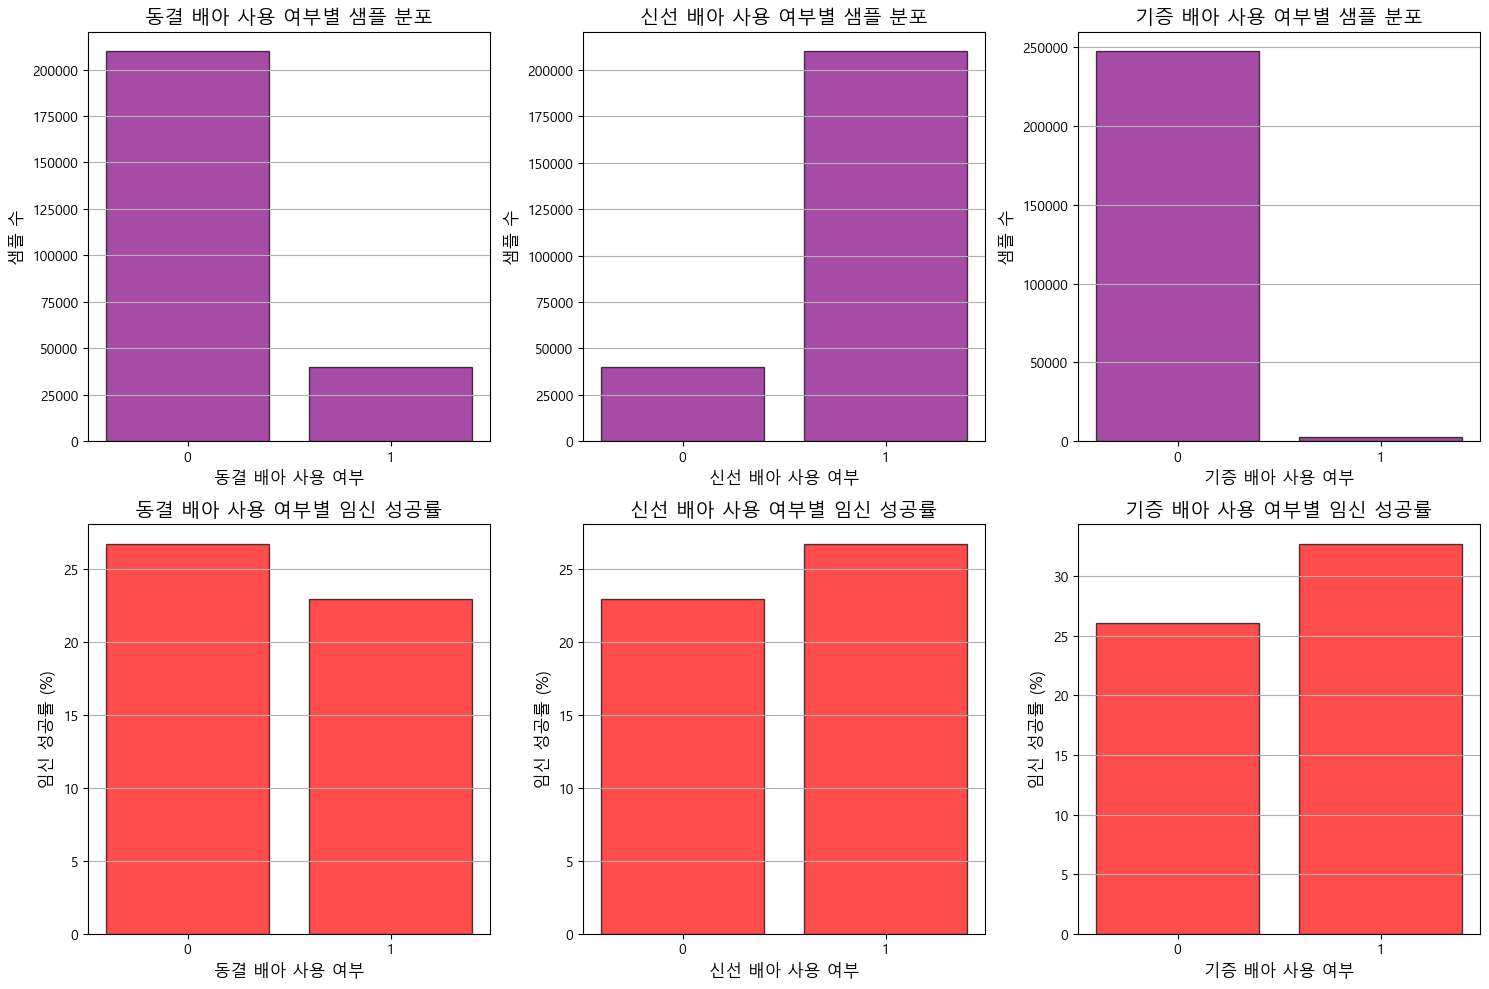

({'동결 배아 사용 여부': 동결 배아 사용 여부
  0.0    209934
  1.0     40126
  Name: count, dtype: int64,
  '신선 배아 사용 여부': 신선 배아 사용 여부
  0.0     39924
  1.0    210136
  Name: count, dtype: int64,
  '기증 배아 사용 여부': 기증 배아 사용 여부
  0.0    247602
  1.0      2458
  Name: count, dtype: int64},
 {'동결 배아 사용 여부': 동결 배아 사용 여부
  0.0    26.776034
  1.0    22.940238
  Name: 임신 성공 여부, dtype: float64,
  '신선 배아 사용 여부': 신선 배아 사용 여부
  0.0    22.958621
  1.0    26.768854
  Name: 임신 성공 여부, dtype: float64,
  '기증 배아 사용 여부': 기증 배아 사용 여부
  0.0    26.095104
  1.0    32.750203
  Name: 임신 성공 여부, dtype: float64})

In [175]:
embryo_usage_counts = {
    "동결 배아 사용 여부": df["동결 배아 사용 여부"].value_counts().sort_index(),
    "신선 배아 사용 여부": df["신선 배아 사용 여부"].value_counts().sort_index(),
    "기증 배아 사용 여부": df["기증 배아 사용 여부"].value_counts().sort_index(),
}

embryo_usage_success_rate = {
    "동결 배아 사용 여부": df.groupby("동결 배아 사용 여부")["임신 성공 여부"].mean() * 100,
    "신선 배아 사용 여부": df.groupby("신선 배아 사용 여부")["임신 성공 여부"].mean() * 100,
    "기증 배아 사용 여부": df.groupby("기증 배아 사용 여부")["임신 성공 여부"].mean() * 100,
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, key in enumerate(embryo_usage_counts.keys()):
    axes[0, i].bar(["0", "1"], embryo_usage_counts[key].values, color="purple", alpha=0.7, edgecolor="black")
    axes[0, i].set_xlabel(key, fontsize=12)
    axes[0, i].set_ylabel("샘플 수", fontsize=12)
    axes[0, i].set_title(f"{key}별 샘플 분포", fontsize=14)
    axes[0, i].grid(axis="y")

for i, key in enumerate(embryo_usage_success_rate.keys()):
    axes[1, i].bar(["0", "1"], embryo_usage_success_rate[key].values, color="red", alpha=0.7, edgecolor="black")
    axes[1, i].set_xlabel(key, fontsize=12)
    axes[1, i].set_ylabel("임신 성공률 (%)", fontsize=12)
    axes[1, i].set_title(f"{key}별 임신 성공률", fontsize=14)
    axes[1, i].grid(axis="y")

plt.tight_layout()
plt.show()

embryo_usage_counts, embryo_usage_success_rate

1. 동결 배아 사용 여부
- 동결 배아를 사용하지 않은 경우가 데이터가 훨씬 많지만 사용할때의 데이터가 적은 양은 아님. 209,934(사용x) vs 40,126(사용o)
- 임신 성공률은 동결 배아를 사용하지 않을 경우가 더 높음.

2. 신선 배아 사용 여부
- 신선 배아를 사용한 경우가 훨씬 많음. 210,136(사용o) vs 39,924(사용x)
- 임신 성공률은 신선 배아를 사용한 경우가 더 높음.

3. 기증 배아 사용 여부
- 기증 배아를 사용하지 않은 경우가 엄청 많고 사용한 경우의 데이터는 매우 적음. 247,602(사용x) vs 2,458(사용o)
- 임신 성공률은 기증 배아를 사용한 경우가 더 높음.
- 하지만, 데이터 불균형이 너무 심해서 유의미한 영향인지 판단하기 애매함.

=> 동결 배아 사용 여부와 신선 배아 사용 여부는 임신 성공률과 연관성이 있음. 기증 배아는 데이터 수가 적어 신뢰하기 애매함.\
=> 이 변수들은 다 중요한 피처임

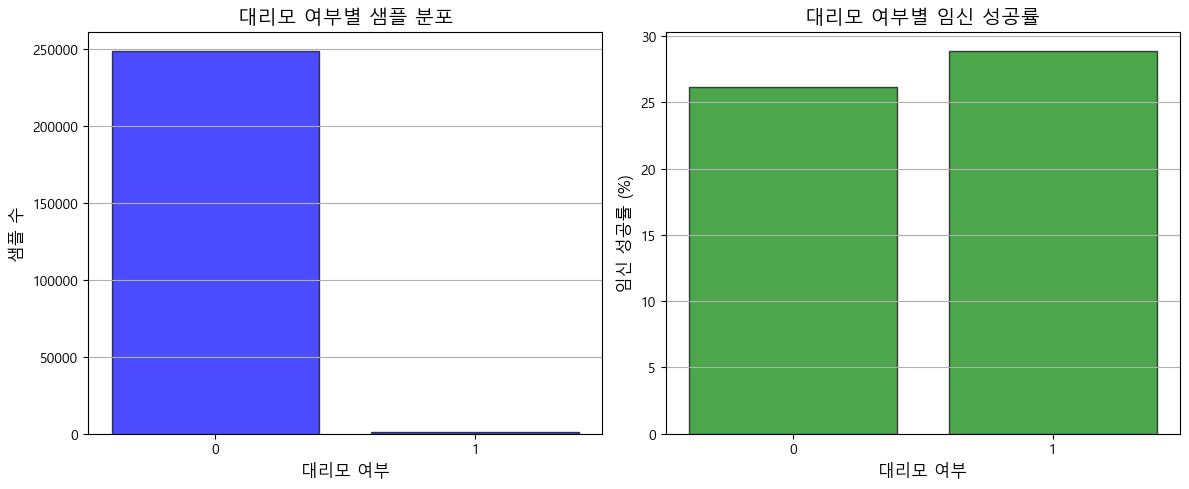

(대리모 여부
 0.0    249011
 1.0      1049
 Name: count, dtype: int64,
 대리모 여부
 0.0    26.149046
 1.0    28.884652
 Name: 임신 성공 여부, dtype: float64)

In [177]:
surrogate_counts = df["대리모 여부"].value_counts().sort_index()
surrogate_success_rate = df.groupby("대리모 여부")["임신 성공 여부"].mean() * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(["0", "1"], surrogate_counts.values, color="blue", alpha=0.7, edgecolor="black")
axes[0].set_xlabel("대리모 여부", fontsize=12)
axes[0].set_ylabel("샘플 수", fontsize=12)
axes[0].set_title("대리모 여부별 샘플 분포", fontsize=14)
axes[0].grid(axis="y")

axes[1].bar(["0", "1"], surrogate_success_rate.values, color="green", alpha=0.7, edgecolor="black")
axes[1].set_xlabel("대리모 여부", fontsize=12)
axes[1].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[1].set_title("대리모 여부별 임신 성공률", fontsize=14)
axes[1].grid(axis="y")

plt.tight_layout()
plt.show()

surrogate_counts, surrogate_success_rate

대리모 여부 분석
- 대리모를 사용하지 않은 경우가 사용한 경우보다 데이터 분포가 압도적으로 많음. 249,011 vs 1,049
- 대리모를 사용하지 않은 경우 임신 성공률 26.15%, 사용한 경우 28.88%. 사용한 경우가 조금 더 높음.

근데 데이터 차이도 너무 큰데 성공률도 솔직히 큰 차이도 없어서 이게 유의미한 변수는 아닌 것 같음.
내가 볼 땐 대리모 여부 피처는 제거하는게 맞음.

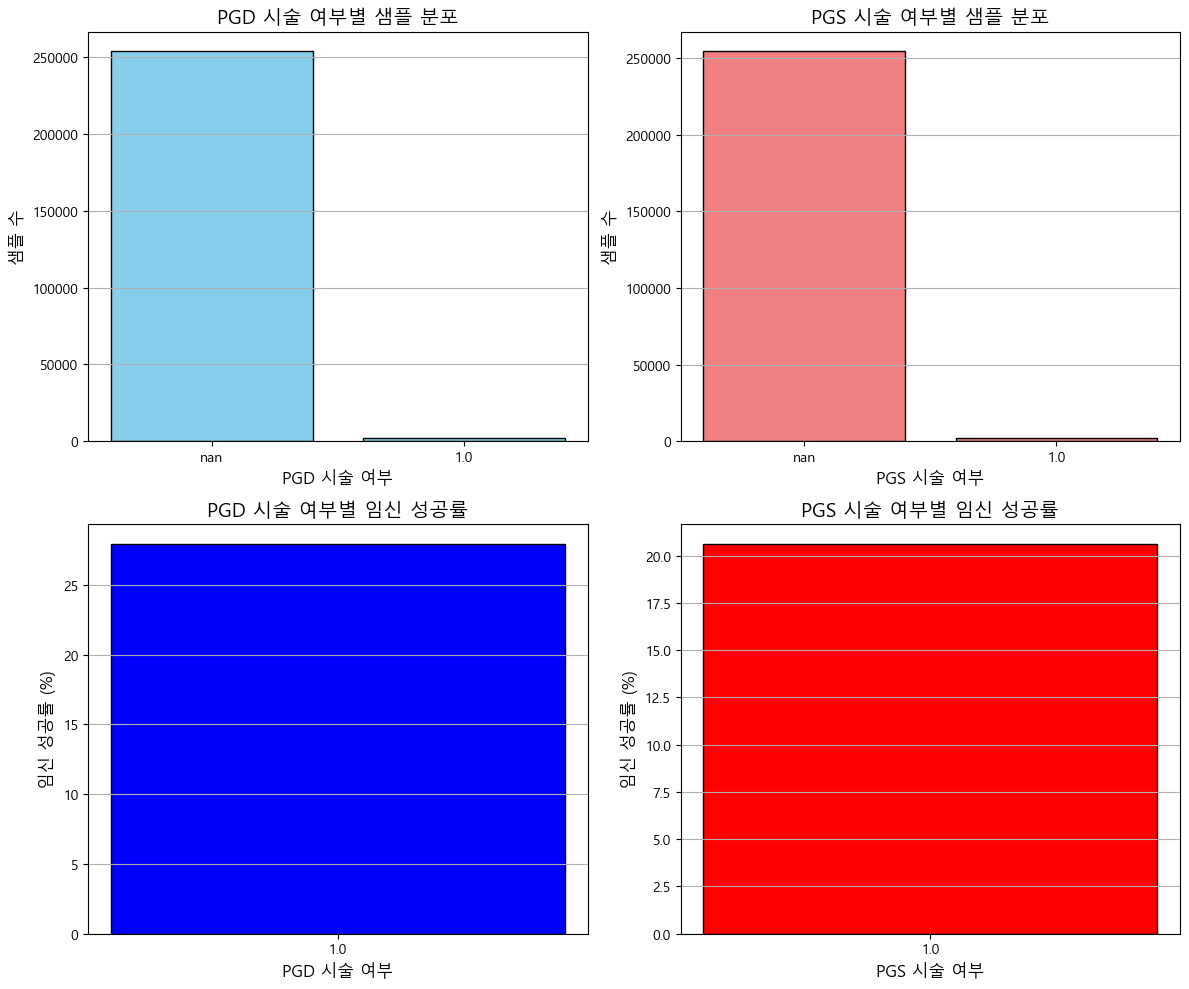

(PGD 시술 여부
 NaN    254172
 1.0      2179
 Name: count, dtype: int64,
 PGS 시술 여부
 NaN    254422
 1.0      1929
 Name: count, dtype: int64,
 PGD 시술 여부
 1.0    27.9486
 Name: 임신 성공 여부, dtype: float64,
 PGS 시술 여부
 1.0    20.632452
 Name: 임신 성공 여부, dtype: float64)

In [179]:
pgd_counts = df["PGD 시술 여부"].value_counts(dropna=False)
pgs_counts = df["PGS 시술 여부"].value_counts(dropna=False)

pgd_success_rate = df.groupby("PGD 시술 여부")["임신 성공 여부"].mean() * 100
pgs_success_rate = df.groupby("PGS 시술 여부")["임신 성공 여부"].mean() * 100

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].bar(pgd_counts.index.astype(str), pgd_counts.values, color="skyblue", edgecolor="black")
axes[0, 0].set_title("PGD 시술 여부별 샘플 분포", fontsize=14)
axes[0, 0].set_xlabel("PGD 시술 여부", fontsize=12)
axes[0, 0].set_ylabel("샘플 수", fontsize=12)
axes[0, 0].grid(axis="y")

axes[0, 1].bar(pgs_counts.index.astype(str), pgs_counts.values, color="lightcoral", edgecolor="black")
axes[0, 1].set_title("PGS 시술 여부별 샘플 분포", fontsize=14)
axes[0, 1].set_xlabel("PGS 시술 여부", fontsize=12)
axes[0, 1].set_ylabel("샘플 수", fontsize=12)
axes[0, 1].grid(axis="y")

axes[1, 0].bar(pgd_success_rate.index.astype(str), pgd_success_rate.values, color="blue", edgecolor="black")
axes[1, 0].set_title("PGD 시술 여부별 임신 성공률", fontsize=14)
axes[1, 0].set_xlabel("PGD 시술 여부", fontsize=12)
axes[1, 0].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[1, 0].grid(axis="y")

axes[1, 1].bar(pgs_success_rate.index.astype(str), pgs_success_rate.values, color="red", edgecolor="black")
axes[1, 1].set_title("PGS 시술 여부별 임신 성공률", fontsize=14)
axes[1, 1].set_xlabel("PGS 시술 여부", fontsize=12)
axes[1, 1].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[1, 1].grid(axis="y")

plt.tight_layout()
plt.show()

pgd_counts, pgs_counts, pgd_success_rate, pgs_success_rate

PGD, PGS 는 각각 유전 질환 검사 , 염색체 검사이다.

PGD 시술 여부
- 시술한 경우 : 2,179명.
- 안한 경우 : 254,172명.
- 데이터 불균형 겁나 심함. 성공률은 27.95%

PGS 시술 여부
- 시술한 경우 : 1,929명.
- 안한 경우 : 254,422명.
- 얘도 불균형 심한데다가 성공 20.63%

피처 제거 여부
- 데이터 불균형이 너무 심함.
- PGD, PSG는 특수한 경우에만 사용하기 때문에 굳이 임신 성공률을 높이는 여기서 쓰기에는 애매함.

=> 피처 제거함.

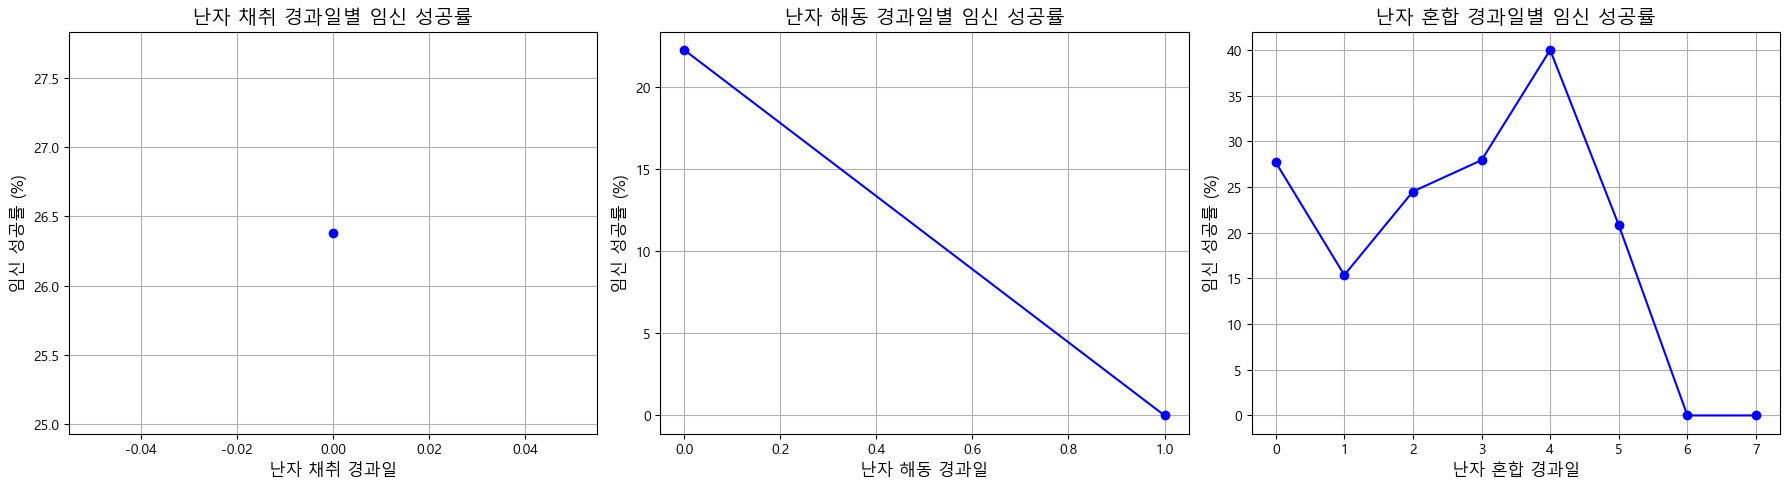

In [182]:
timing_columns = ["난자 채취 경과일", "난자 해동 경과일", "난자 혼합 경과일"]

timing_success_rates = {}
for col in timing_columns:
    timing_success_rates[col] = df.groupby(col)["임신 성공 여부"].mean() * 100

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(timing_columns):
    axes[i].plot(timing_success_rates[col].index, timing_success_rates[col].values, marker="o", linestyle="-", color="b")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("임신 성공률 (%)", fontsize=12)
    axes[i].set_title(f"{col}별 임신 성공률", fontsize=14)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

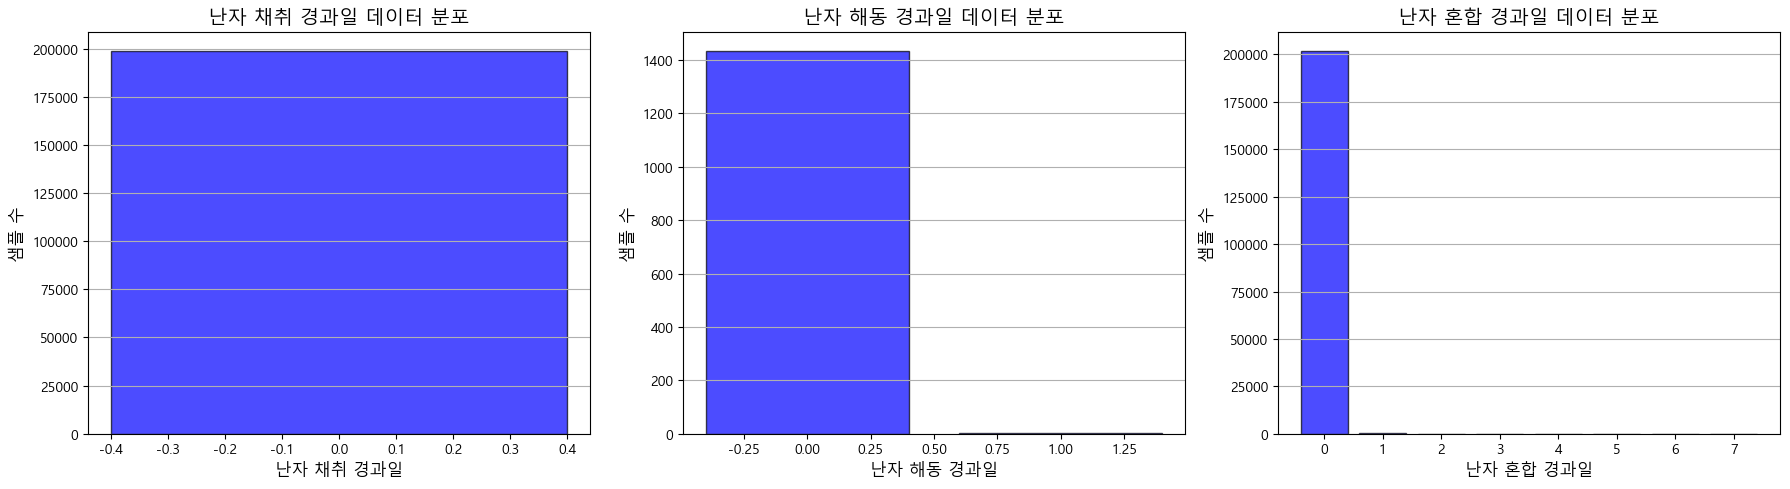

난자 채취 경과일 샘플 개수:
난자 채취 경과일
0.0    198863
Name: count, dtype: int64


난자 해동 경과일 샘플 개수:
난자 해동 경과일
0.0    1434
1.0       2
Name: count, dtype: int64


난자 혼합 경과일 샘플 개수:
난자 혼합 경과일
0.0    201920
1.0       488
2.0       102
3.0        68
4.0         5
5.0        24
6.0         8
7.0         1
Name: count, dtype: int64




In [194]:
timing_columns = ["난자 채취 경과일", "난자 해동 경과일", "난자 혼합 경과일"]

sample_counts = {col: df[col].dropna().value_counts().sort_index() for col in timing_columns}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(timing_columns):
    axes[i].bar(sample_counts[col].index, sample_counts[col].values, color="blue", alpha=0.7, edgecolor="black")
    axes[i].set_xlabel(f"{col}", fontsize=12)
    axes[i].set_ylabel("샘플 수", fontsize=12)
    axes[i].set_title(f"{col} 데이터 분포", fontsize=14)
    axes[i].grid(axis="y")

plt.tight_layout()
plt.show()

for col in timing_columns:
    print(f"{col} 샘플 개수:")
    print(sample_counts[col])
    print("\n" + "="*30 + "\n")


난자 채취 경과일
- 변수가 일단 0 1개임.
- 이 변수는 의미 없어 보임.

난자 해동 경과일
- 0과 1로 분포 되있기 때문에. 경과일 보다는 해동 여부 인듯.
- 데이터가 또 겁나게 작아요. 전체 데이터 약 25만개 중에 1434개,2개인데 심지어 둘이 불균형도 심함
- 쓸 필요 없어보임.

난자 혼합 경과일
- 0일이 대부분의 데이터고 나머지 1~7일은 데이터 개수가 극 소수임.
- 난자 혼합 경과일은 0일과 1~7일을 묶어서 이진화해서 분석하면 괜찮을듯.

=> 난자 채취 경과일, 난자 해동 경과일 컬럼은 일단 제거.

#### 난자 혼합 여부로 다시 분류

C:\Users\82108\AppData\Local\Temp\ipykernel_14740\906244631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["난자 혼합 여부"] = df["난자 혼합 경과일"].apply(lambda x: 0 if x == 0 else 1)


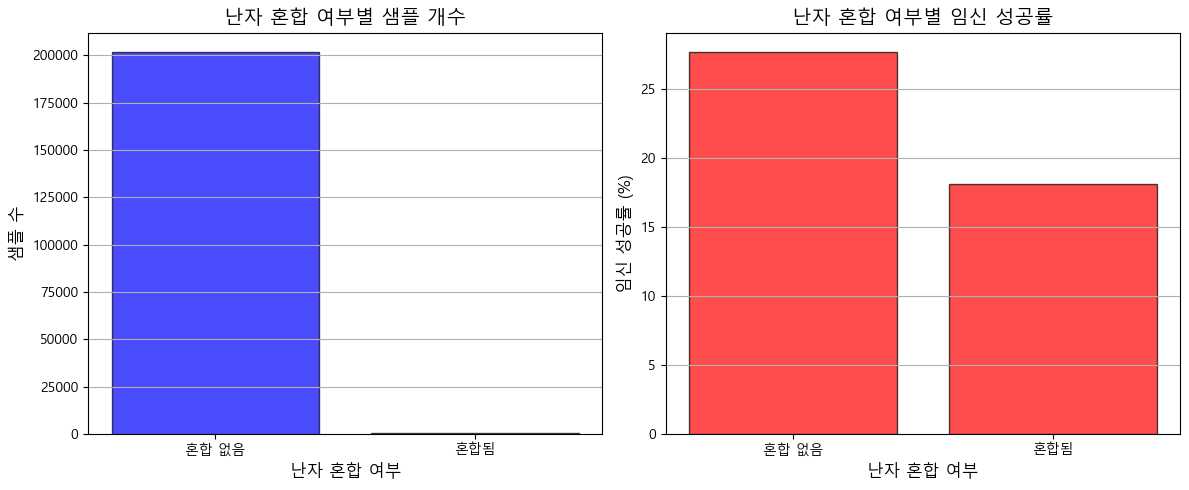

(난자 혼합 여부
 0    201920
 1       696
 Name: count, dtype: int64,
 난자 혼합 여부
 0    27.707508
 1    18.103448
 Name: 임신 성공 여부, dtype: float64)

In [28]:
df = df.dropna(subset=["난자 혼합 경과일", "임신 성공 여부"])
df["난자 혼합 여부"] = df["난자 혼합 경과일"].apply(lambda x: 0 if x == 0 else 1)

sample_counts = df["난자 혼합 여부"].value_counts().sort_index()
success_rate = df.groupby("난자 혼합 여부")["임신 성공 여부"].mean() * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(sample_counts.index, sample_counts.values, color="blue", alpha=0.7, edgecolor="black")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["혼합 없음", "혼합됨"])
axes[0].set_xlabel("난자 혼합 여부", fontsize=12)
axes[0].set_ylabel("샘플 수", fontsize=12)
axes[0].set_title("난자 혼합 여부별 샘플 개수", fontsize=14)
axes[0].grid(axis="y")

axes[1].bar(success_rate.index, success_rate.values, color="red", alpha=0.7, edgecolor="black")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["혼합 없음", "혼합됨"])
axes[1].set_xlabel("난자 혼합 여부", fontsize=12)
axes[1].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[1].set_title("난자 혼합 여부별 임신 성공률", fontsize=14)
axes[1].grid(axis="y")

plt.tight_layout()
plt.show()


sample_counts, success_rate

난자 혼합 여부
- 데이터 불균형이 매우 심하지만, 성공률이 극명하게 갈림.
- 고려는 해볼 만한 피처이므로 제거는 x.
- 혼합 없음은 성공률이 27.7%, 혼합한 경우 성공률이 18.8%

⇒ 난자 혼합 여부는 임신 성공률과 어느 정도 관계가 있는 피처로 판단 됨.

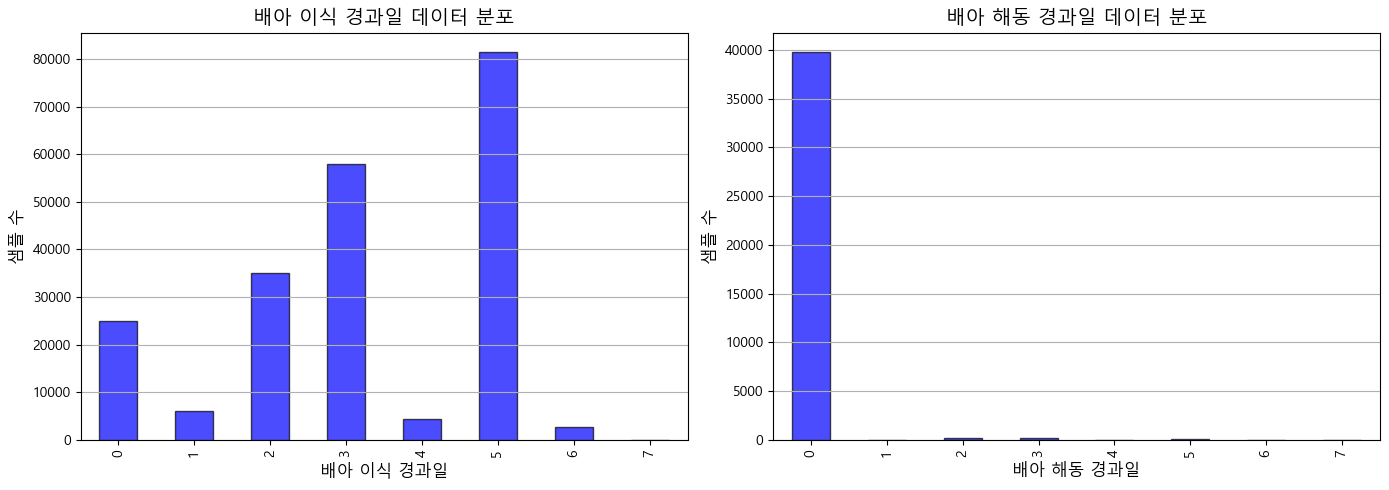

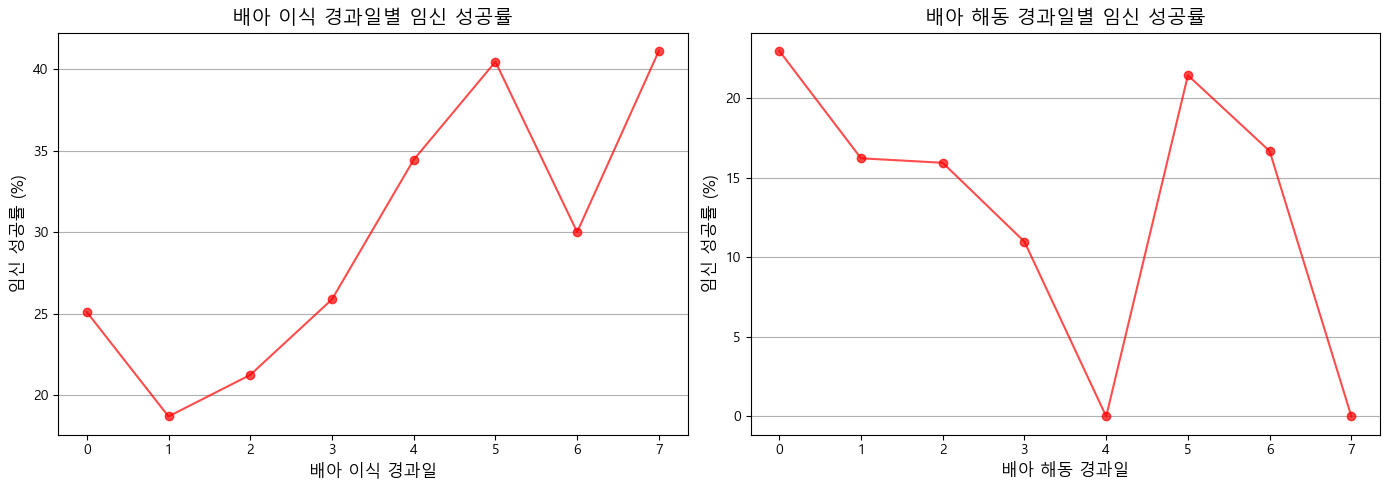

{'배아 이식 경과일': 배아 이식 경과일
 0    24904
 1     6053
 2    35078
 3    57924
 4     4504
 5    81459
 6     2773
 7       90
 Name: count, dtype: int64,
 '배아 해동 경과일': 배아 해동 경과일
 0    39801
 1       37
 2      182
 3      164
 4       12
 5      140
 6       30
 7        3
 Name: count, dtype: int64}

In [5]:
embryo_days_features = ["배아 이식 경과일", "배아 해동 경과일"]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, feature in enumerate(embryo_days_features):
    df[feature].dropna().astype(int).value_counts().sort_index().plot(
        kind="bar", color="blue", alpha=0.7, edgecolor="black", ax=axes[i]
    )
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("샘플 수", fontsize=12)
    axes[i].set_title(f"{feature} 데이터 분포", fontsize=14)
    axes[i].grid(axis="y")

plt.tight_layout()
plt.show()

success_rates = {}
for feature in embryo_days_features:
    success_rates[feature] = df.groupby(feature)["임신 성공 여부"].mean() * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, feature in enumerate(embryo_days_features):
    success_rates[feature].dropna().plot(
        kind="line", marker="o", color="red", alpha=0.7, ax=axes[i]
    )
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("임신 성공률 (%)", fontsize=12)
    axes[i].set_title(f"{feature}별 임신 성공률", fontsize=14)
    axes[i].grid(axis="y")

plt.tight_layout()
plt.show()

sample_counts = {feature: df[feature].dropna().astype(int).value_counts().sort_index() for feature in embryo_days_features}
sample_counts

**배아 이식 경과일**

- **5일 차에 가장 많은 시술이 이루어짐**, 2~3일 차에도 비교적 많은 분포를 보임.
- 6~7일 차는 상대적으로 적은 샘플 수를 가짐.
- **임신 성공률은 5~7일 차로 갈수록 점점 증가**하는 경향이 나타남.
    - 6일 차에서 잠깐 성공률이 떨어지는 이유는 샘플 개수가 적어서 발생한 것으로 추정된다.

**배아 해동 경과일**

- 0일차에 데이터가 압도적으로 많음.
- 1일 이상 경과한 샘플은 매우 적음.
- 0일차에는 약 20% 성공률을 보이고, 그 이후로는 데이터가 부족하여 들쭉날쭉한 경향을 보임.
- **0일과 그 이후로 이분화하여 분석할 생각.**
- **분석 후 임신 성공률과  유의미한 영향이 없다면 변수 제거 고려.**

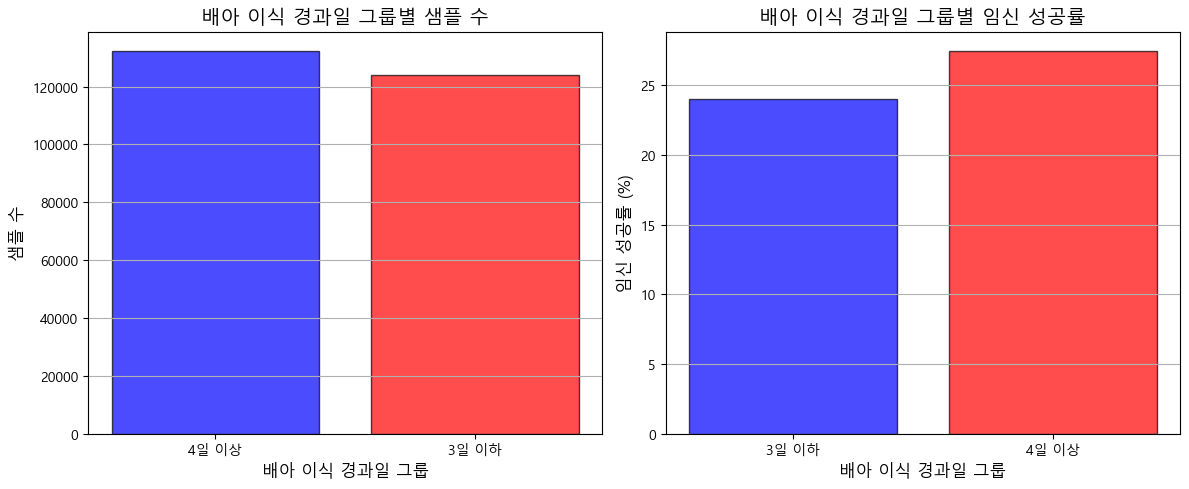

(배아 이식 경과일 그룹
 4일 이상    132392
 3일 이하    123959
 Name: count, dtype: int64,
 배아 이식 경과일 그룹
 3일 이하    24.061182
 4일 이상    27.495619
 Name: 임신 성공 여부, dtype: float64)

In [11]:
df["배아 이식 경과일 그룹"] = df["배아 이식 경과일"].apply(lambda x: "3일 이하" if x <= 3 else "4일 이상")

group_counts = df["배아 이식 경과일 그룹"].value_counts()
group_success_rates = df.groupby("배아 이식 경과일 그룹")["임신 성공 여부"].mean() * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(group_counts.index, group_counts.values, color=["blue", "red"], alpha=0.7, edgecolor="black")
axes[0].set_title("배아 이식 경과일 그룹별 샘플 수", fontsize=14)
axes[0].set_xlabel("배아 이식 경과일 그룹", fontsize=12)
axes[0].set_ylabel("샘플 수", fontsize=12)
axes[0].grid(axis="y")

axes[1].bar(group_success_rates.index, group_success_rates.values, color=["blue", "red"], alpha=0.7, edgecolor="black")
axes[1].set_title("배아 이식 경과일 그룹별 임신 성공률", fontsize=14)
axes[1].set_xlabel("배아 이식 경과일 그룹", fontsize=12)
axes[1].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[1].grid(axis="y")

plt.tight_layout()
plt.show()

group_counts, group_success_rates

- **배아 이식 경과일이 확실히 4일 이후에 성공률이 좋은 것으로 두드러짐.**
- **배아 이식 경과일이 증가할수록 어느정도 임신 성공률에 좋은 기여를 함.**

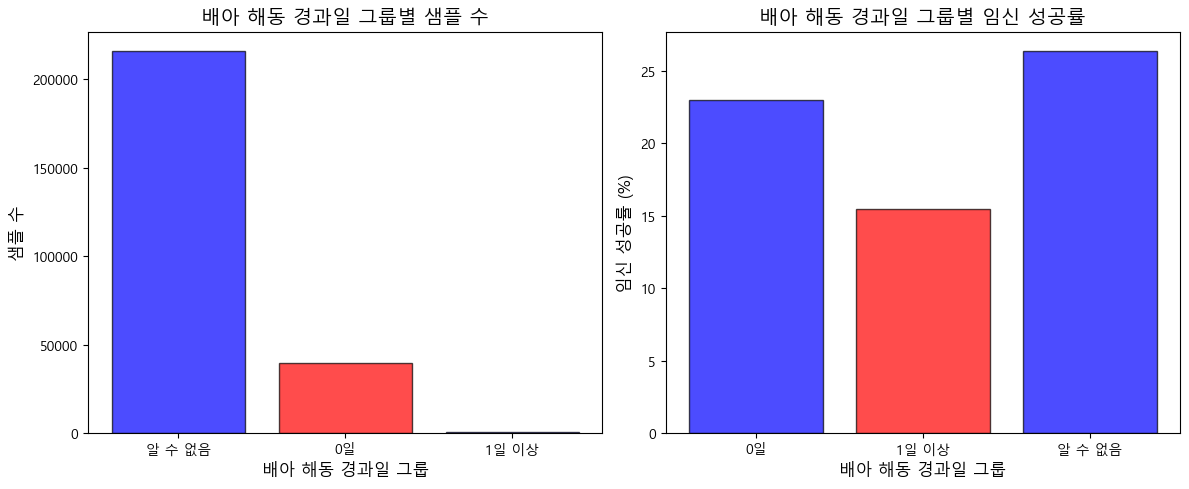

(배아 해동 경과일 그룹
 알 수 없음    215982
 0일         39801
 1일 이상        568
 Name: count, dtype: int64,
 배아 해동 경과일 그룹
 0일        22.966760
 1일 이상     15.492958
 알 수 없음    26.390625
 Name: 임신 성공 여부, dtype: float64)

In [ ]:
df["배아 해동 경과일 그룹"] = df["배아 해동 경과일"].apply(
    lambda x: "0일" if x == 0 else ("1일 이상" if pd.notna(x) else "알 수 없음"))


embryo_thawing_count = df["배아 해동 경과일 그룹"].value_counts()

embryo_thawing_success_rate = df.groupby("배아 해동 경과일 그룹")["임신 성공 여부"].mean() * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(embryo_thawing_count.index, embryo_thawing_count.values, color=["blue", "red"], alpha=0.7, edgecolor="black")
axes[0].set_xlabel("배아 해동 경과일 그룹", fontsize=12)
axes[0].set_ylabel("샘플 수", fontsize=12)
axes[0].set_title("배아 해동 경과일 그룹별 샘플 수", fontsize=14)

axes[1].bar(embryo_thawing_success_rate.index, embryo_thawing_success_rate.values, color=["blue", "red"], alpha=0.7, edgecolor="black")
axes[1].set_xlabel("배아 해동 경과일 그룹", fontsize=12)
axes[1].set_ylabel("임신 성공률 (%)", fontsize=12)
axes[1].set_title("배아 해동 경과일 그룹별 임신 성공률", fontsize=14)

plt.tight_layout()
plt.show()

embryo_thawing_count, embryo_thawing_success_rate

**배아 해동 경과일 분석**

- 해동 배아는 0일 이후 성공률이 낮아짐.
- 1일 이상부터는 데이터 수가 적어 판단하기는 애매하지만, 배아 해동은 0일과 0일 이후 성공률이 어느정도 차이는 나긴함.

**⇒ 하지만 1일 이후 데이터가 너무 적어 기간별로 나눠 판단하기는 애매함.**

**=> 알 수 없는 그룹은 신선 배아일 가능성이 있음. 신선 배아와 해동 배아 성공률 비교를 해볼 생각임.**

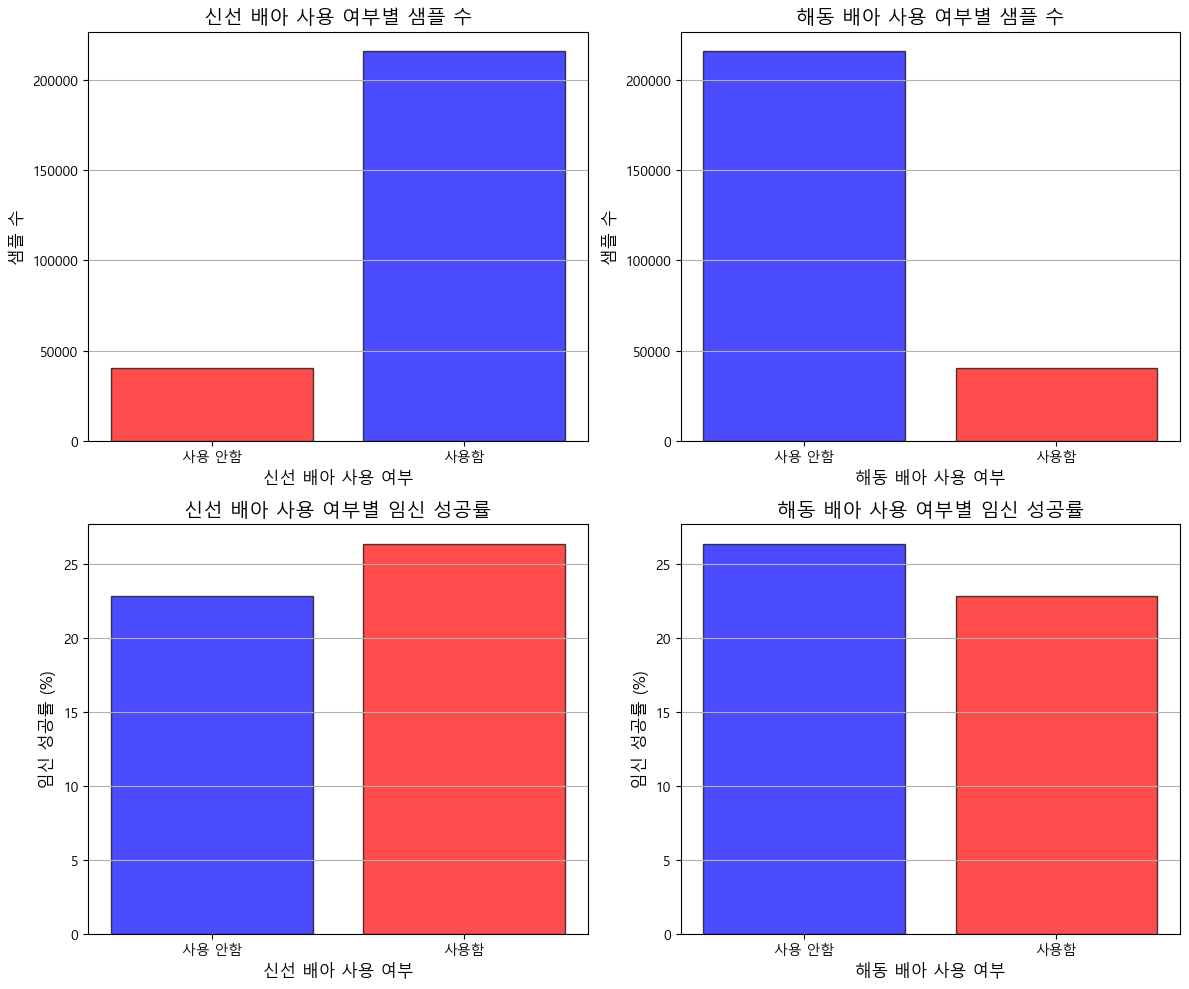

({'신선 배아 사용 여부': 신선 배아 사용 여부
  1    215982
  0     40369
  Name: count, dtype: int64,
  '해동 배아 사용 여부': 해동 배아 사용 여부
  0    215982
  1     40369
  Name: count, dtype: int64},
 {'신선 배아 사용 여부': 신선 배아 사용 여부
  0    22.861602
  1    26.390625
  Name: 임신 성공 여부, dtype: float64,
  '해동 배아 사용 여부': 해동 배아 사용 여부
  0    26.390625
  1    22.861602
  Name: 임신 성공 여부, dtype: float64})

In [14]:
df["신선 배아 사용 여부"] = df["배아 해동 경과일"].isna().astype(int)
df["해동 배아 사용 여부"] = (~df["배아 해동 경과일"].isna()).astype(int)

fresh_frozen_counts = {
    "신선 배아 사용 여부": df["신선 배아 사용 여부"].value_counts(),
    "해동 배아 사용 여부": df["해동 배아 사용 여부"].value_counts(),
}

fresh_frozen_success_rate = {
    "신선 배아 사용 여부": df.groupby("신선 배아 사용 여부")["임신 성공 여부"].mean() * 100,
    "해동 배아 사용 여부": df.groupby("해동 배아 사용 여부")["임신 성공 여부"].mean() * 100,
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, key in enumerate(fresh_frozen_counts.keys()):
    axes[0, i].bar(fresh_frozen_counts[key].index, fresh_frozen_counts[key].values, color=["blue", "red"], alpha=0.7, edgecolor="black")
    axes[0, i].set_xlabel(key, fontsize=12)
    axes[0, i].set_ylabel("샘플 수", fontsize=12)
    axes[0, i].set_title(f"{key}별 샘플 수", fontsize=14)
    axes[0, i].set_xticks([0, 1])
    axes[0, i].set_xticklabels(["사용 안함", "사용함"])
    axes[0, i].grid(axis="y")

for i, key in enumerate(fresh_frozen_success_rate.keys()):
    axes[1, i].bar(fresh_frozen_success_rate[key].index, fresh_frozen_success_rate[key].values, color=["blue", "red"], alpha=0.7, edgecolor="black")
    axes[1, i].set_xlabel(key, fontsize=12)
    axes[1, i].set_ylabel("임신 성공률 (%)", fontsize=12)
    axes[1, i].set_title(f"{key}별 임신 성공률", fontsize=14)
    axes[1, i].set_xticks([0, 1])
    axes[1, i].set_xticklabels(["사용 안함", "사용함"])
    axes[1, i].grid(axis="y")

plt.tight_layout()
plt.show()

fresh_frozen_counts, fresh_frozen_success_rate

신선 배아 VS 해동 배아 분석
- 신선 배아 데이터 개수 : 215,982
- 해동 배아 데이터 개수 : 40,369

임신 성공률
- 신선 배아 : 26.39%
- 해동 배아 : 22.86%

=> 샘플 수 차이가 나지만 그래도 불균형이 심한 정도는 아님.\
=> 신선 배아가 해동 배아보다 성공률이 차이가 나며, 배아 해동 경과일도 임신 성공률과 유의미한 영향이 있기 때문에 중요한 변수로 고려.